## HYCOM Data: salinity and temperature data - 3/26/2019 18:00 UTC - CalCOFI line 90

In [2]:
import os
import datetime
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore') 
from importlib import reload
import time
import math
import scipy.stats as stats
import netCDF4 as netcdf # importing
import glob # making .GIFs
from PIL import Image

import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

## Data

In [3]:
# import CalCOFI station data
calcofi_stn_DF = pd.read_csv("CalCOFIStationOrder.csv")
calcofi90_stn_DF = calcofi_stn_DF[calcofi_stn_DF['Line ']==90]
lat90 = calcofi90_stn_DF['Station Dlatitude '].values
lon90 = calcofi90_stn_DF['Dlongitude '].values

In [4]:
# import NetCDF data
NetCDF_Data_Name = "HYCOM_sal_temp_3.nc4"

netcdf_data = netcdf.Dataset(NetCDF_Data_Name)

netcdf_data.variables.keys()
salinity = netcdf_data.variables['salinity'][:].data
water_temp = netcdf_data.variables['water_temp'][:].data
times = netcdf_data.variables['time'][:].data
depth = netcdf_data.variables['depth'][:].data
lats = netcdf_data.variables['lat'][:].data
lons = netcdf_data.variables['lon'][:].data

In [5]:
xx, yy = np.meshgrid(lons, lats)

## Salinity 

Done!
Wall time: 35.7 s


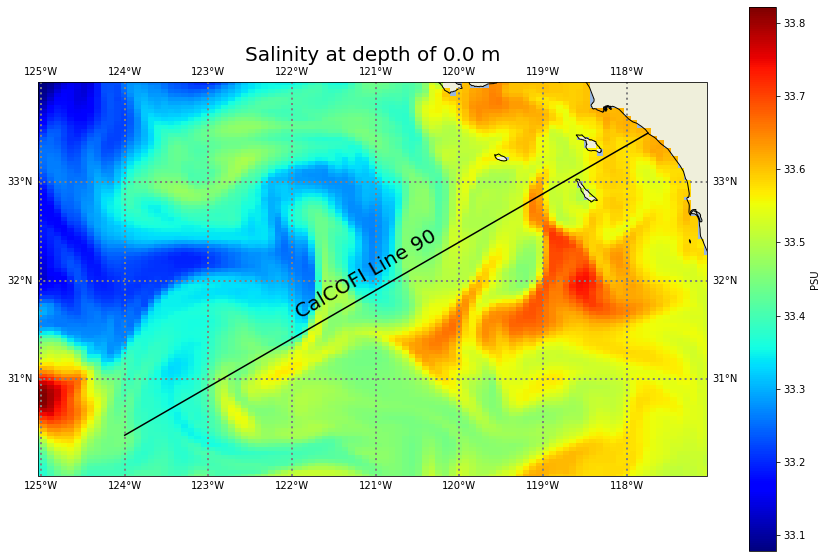

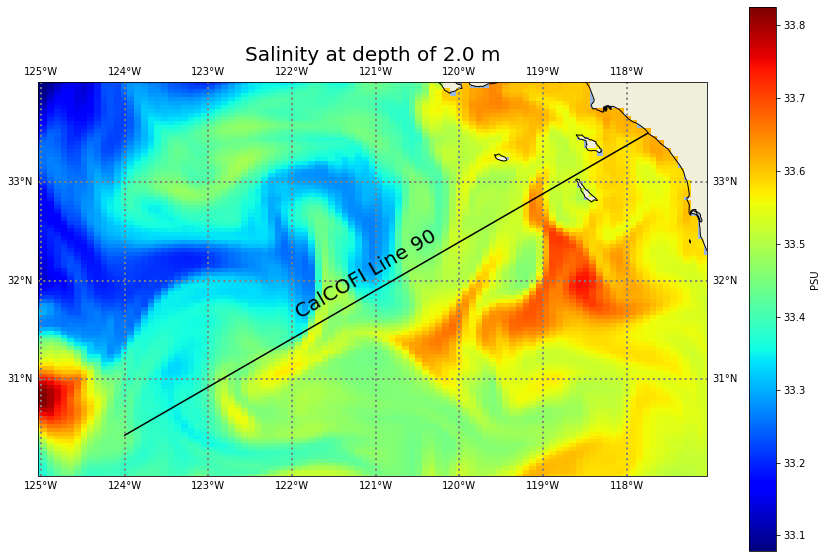

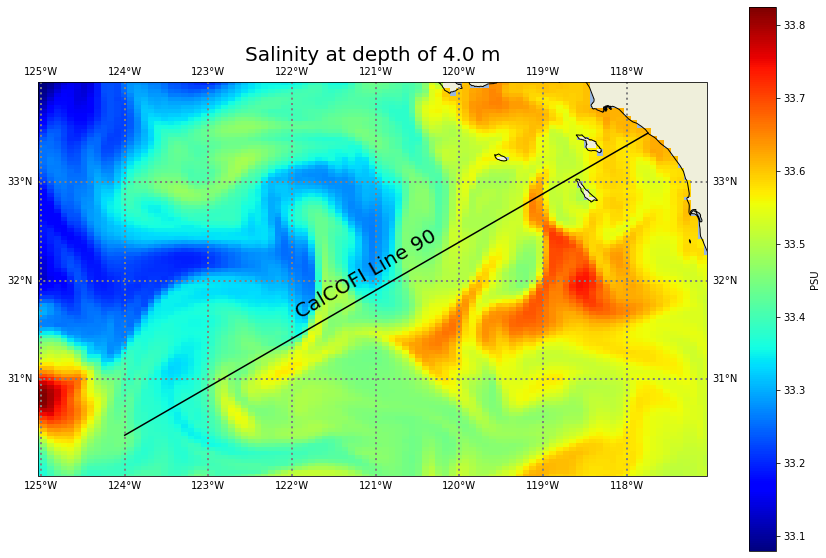

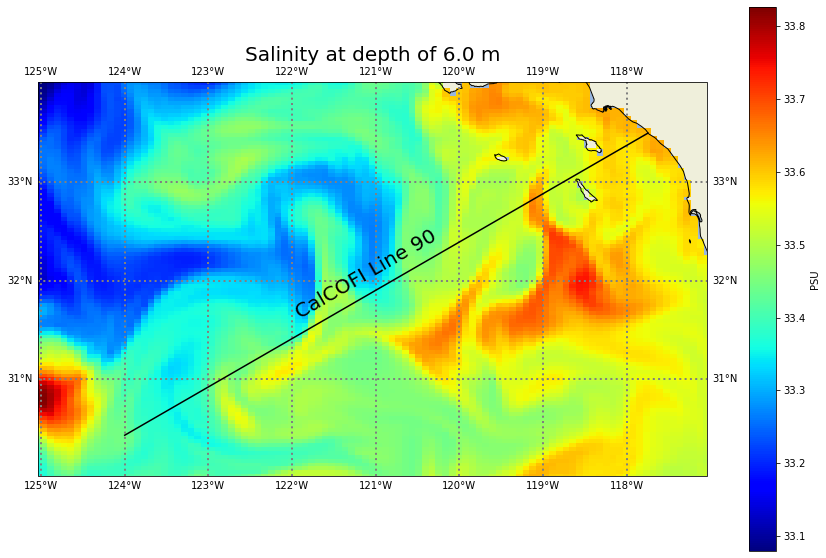

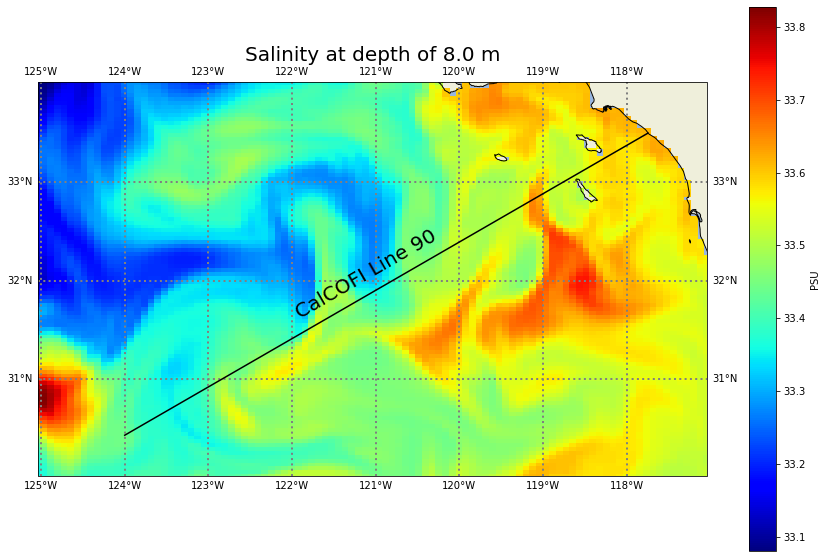

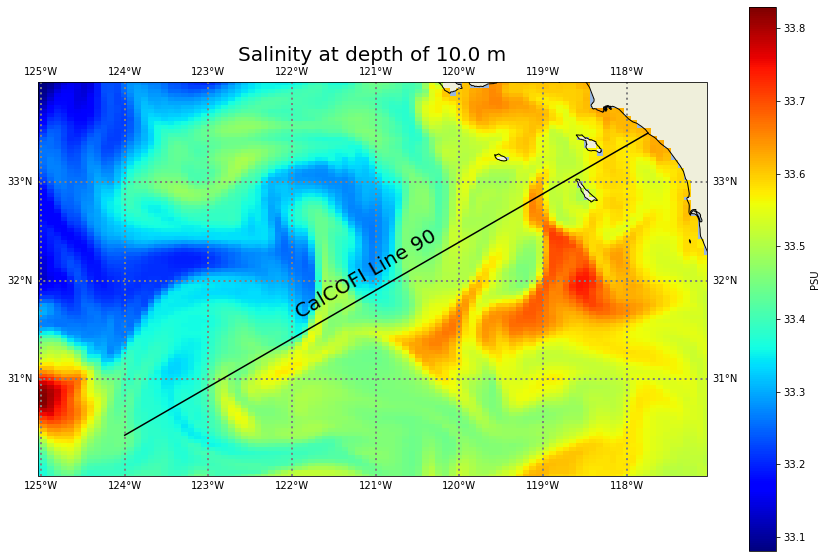

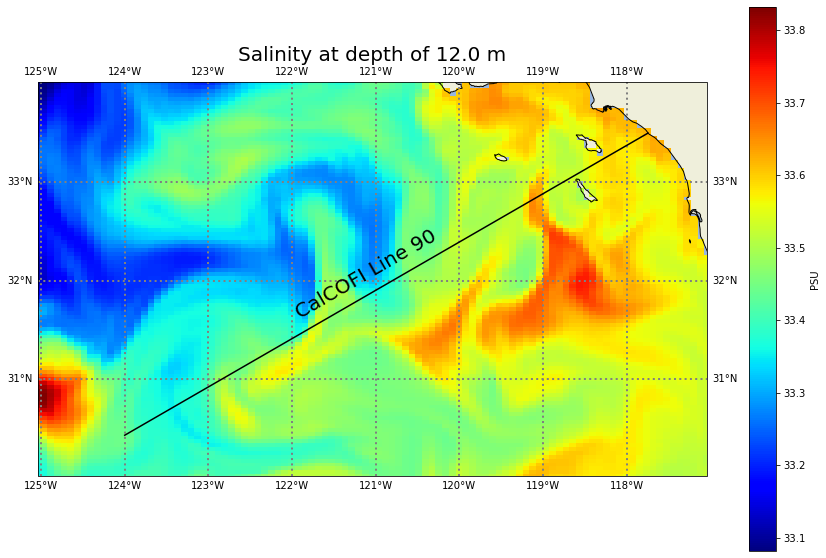

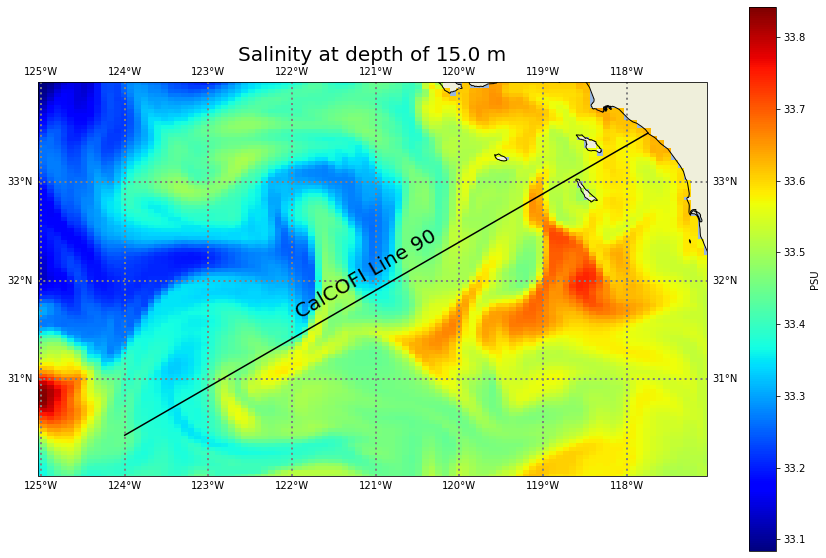

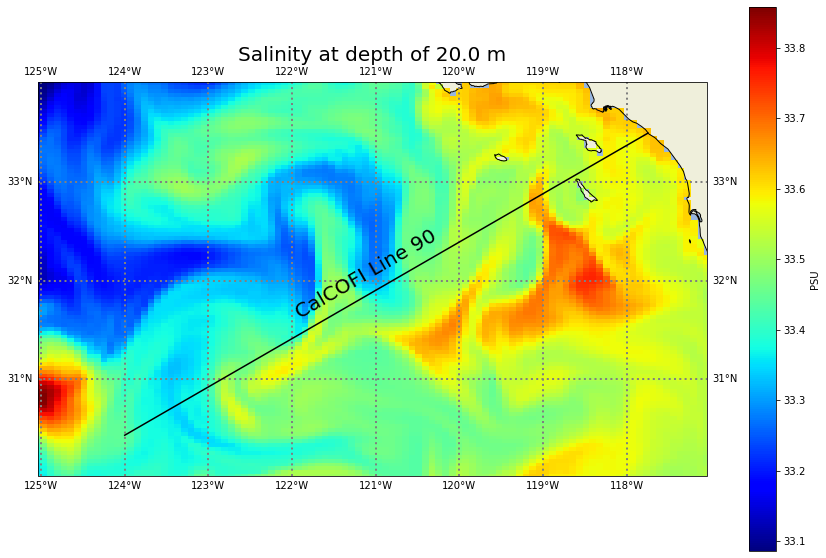

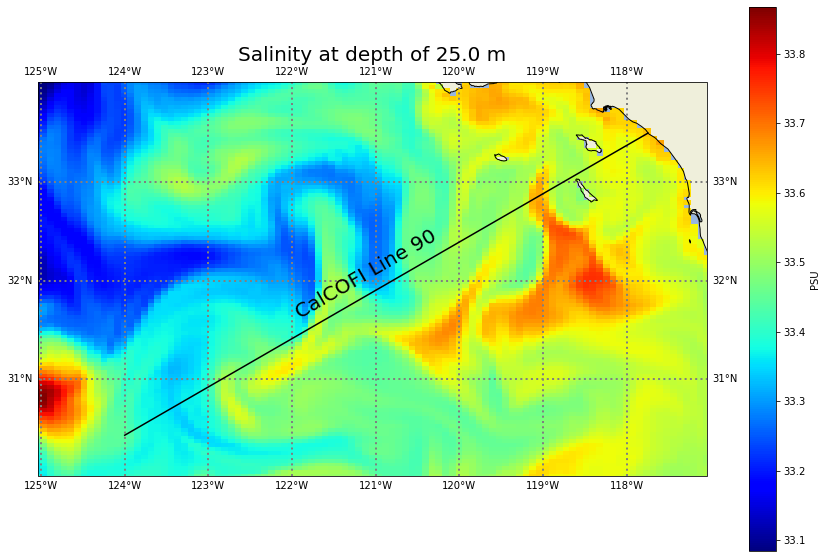

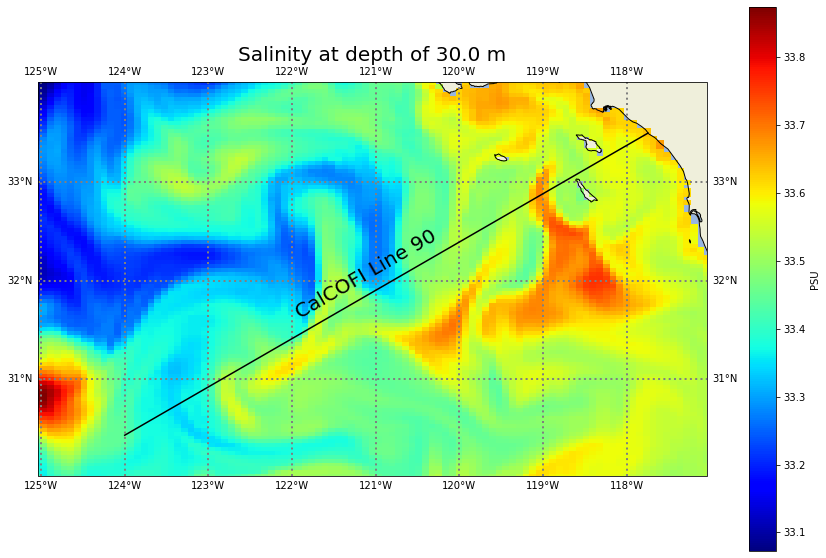

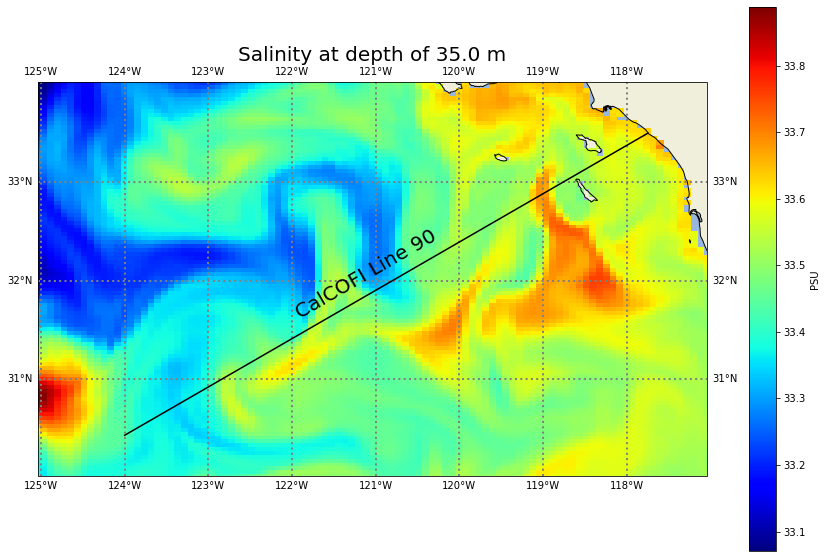

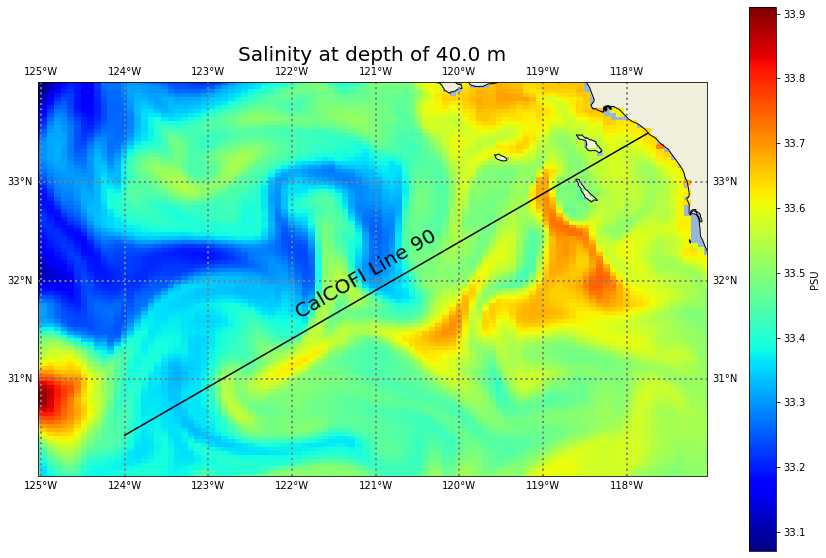

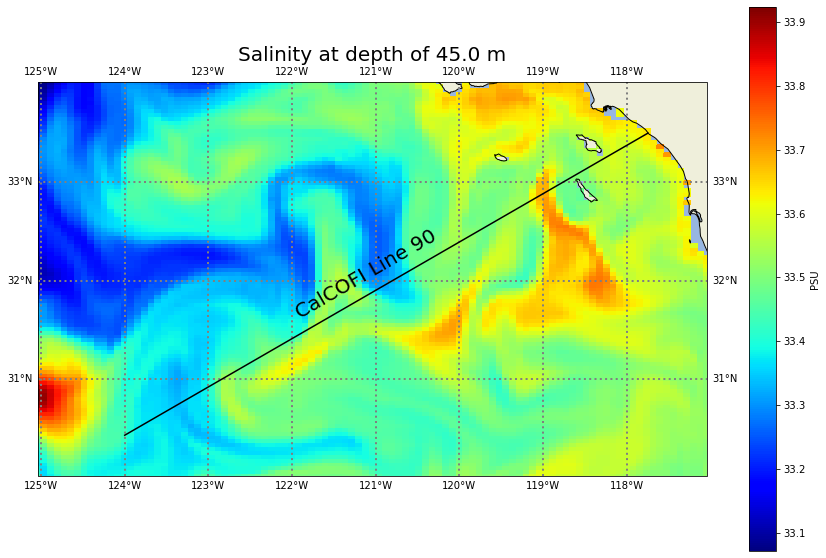

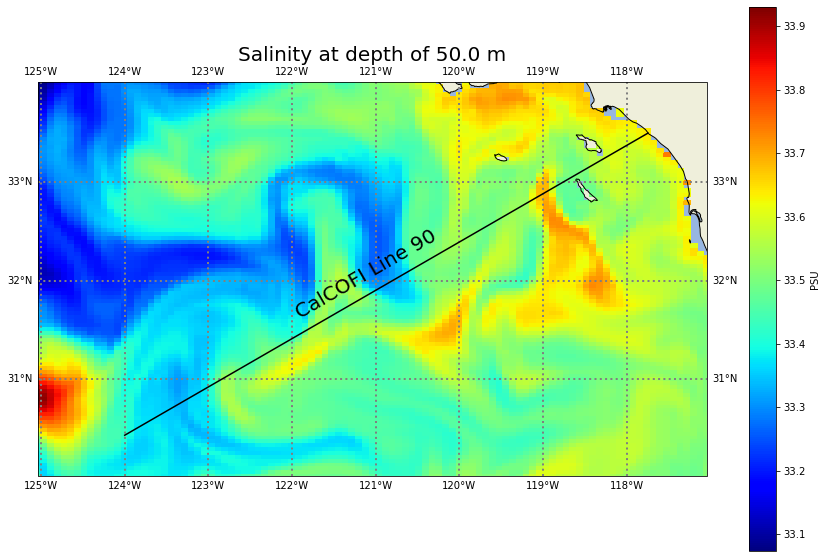

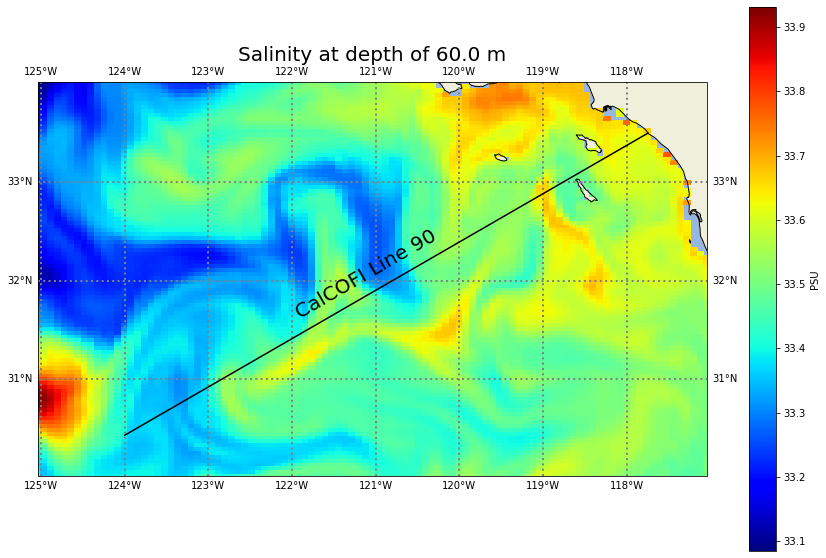

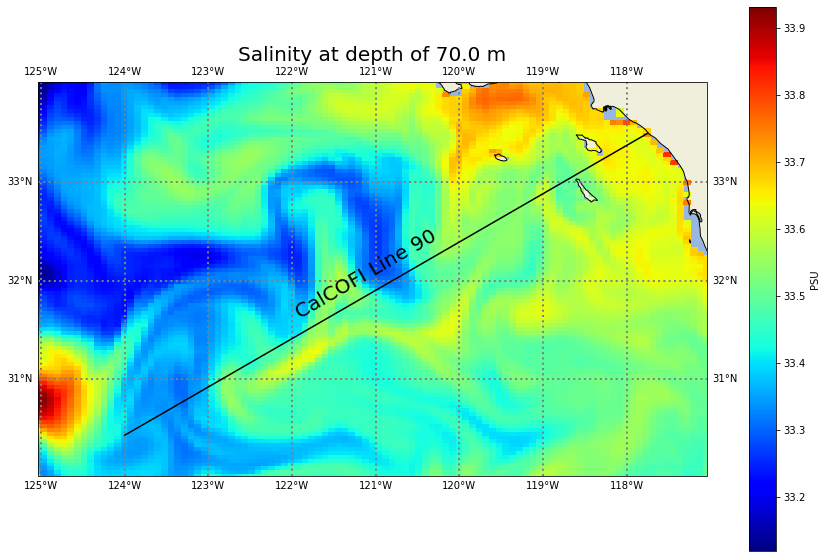

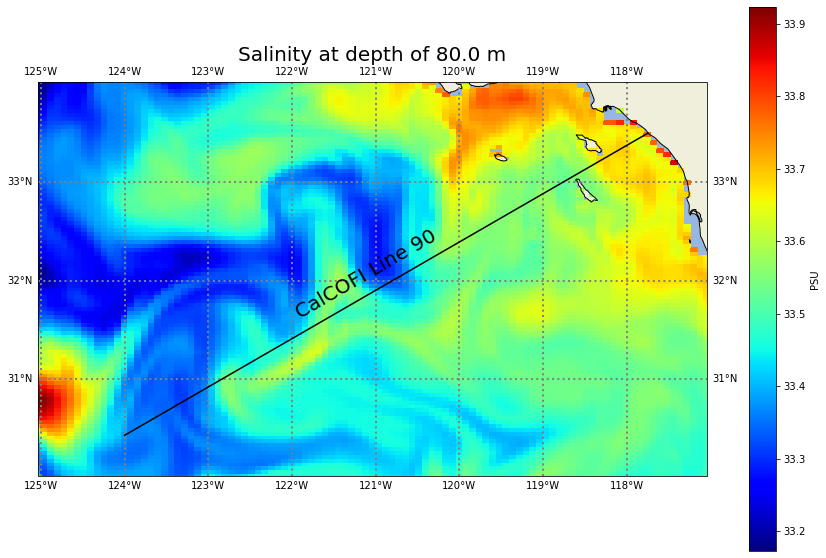

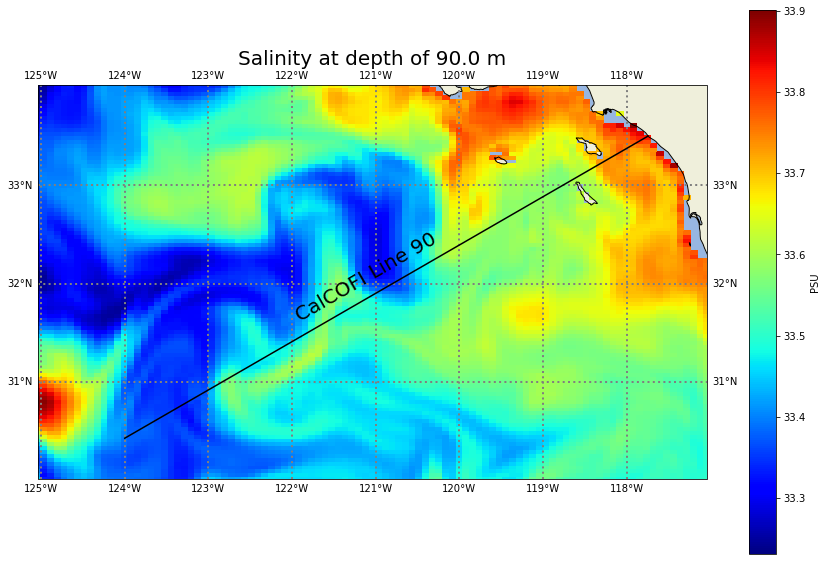

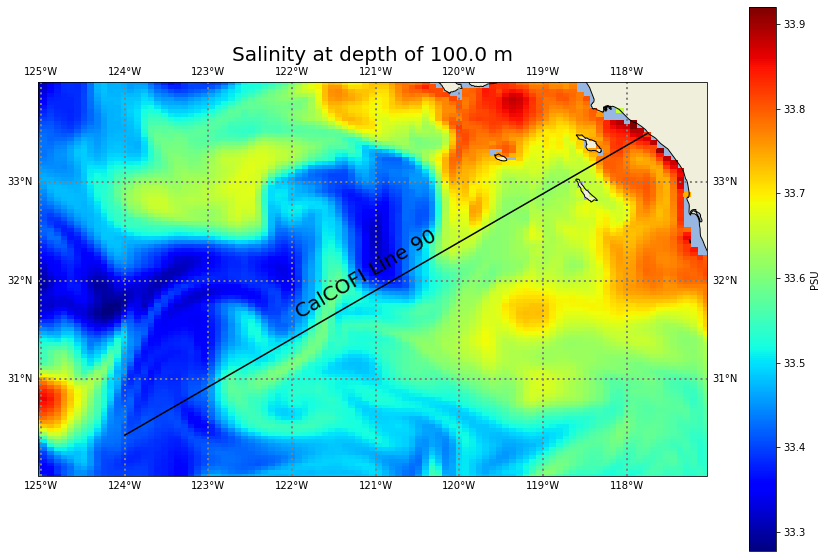

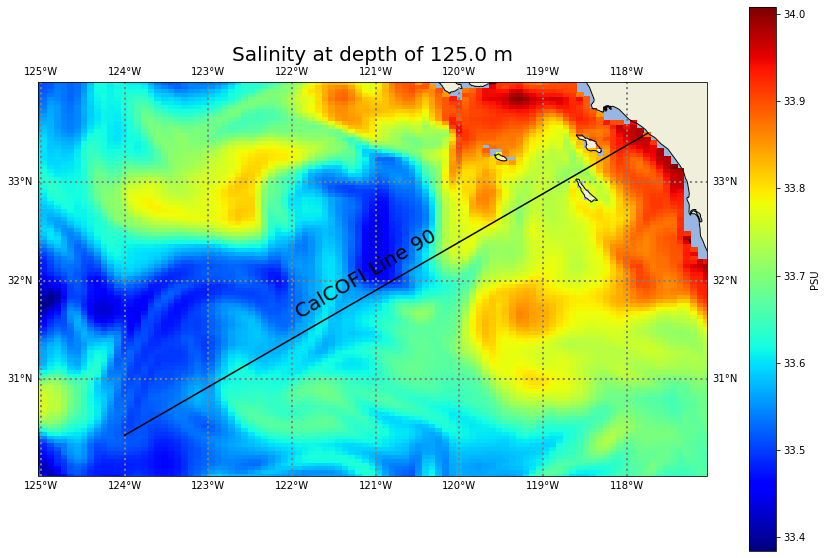

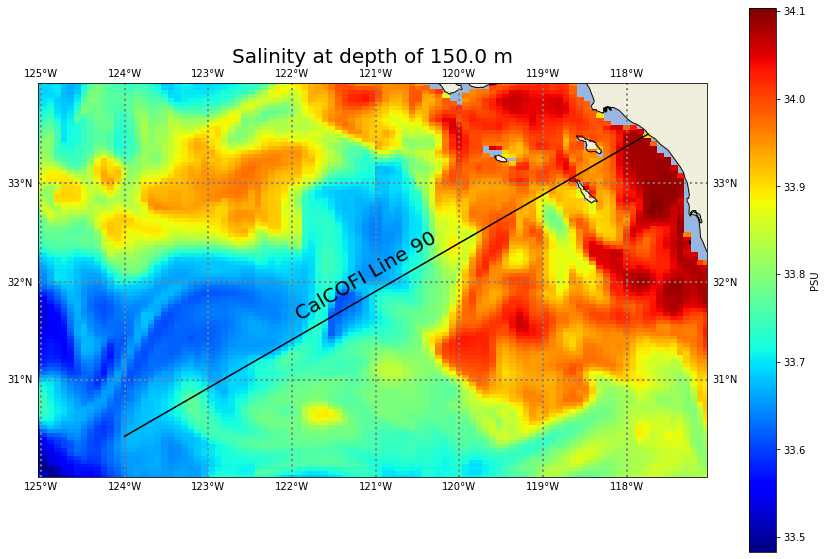

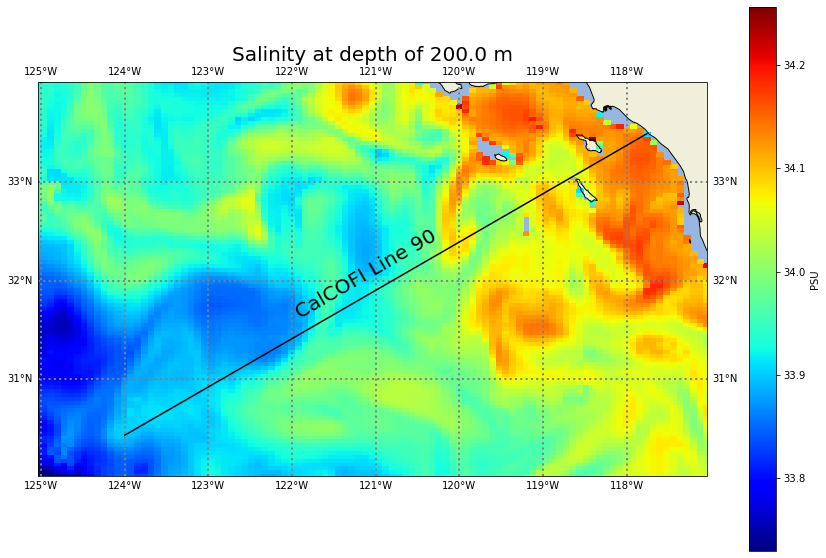

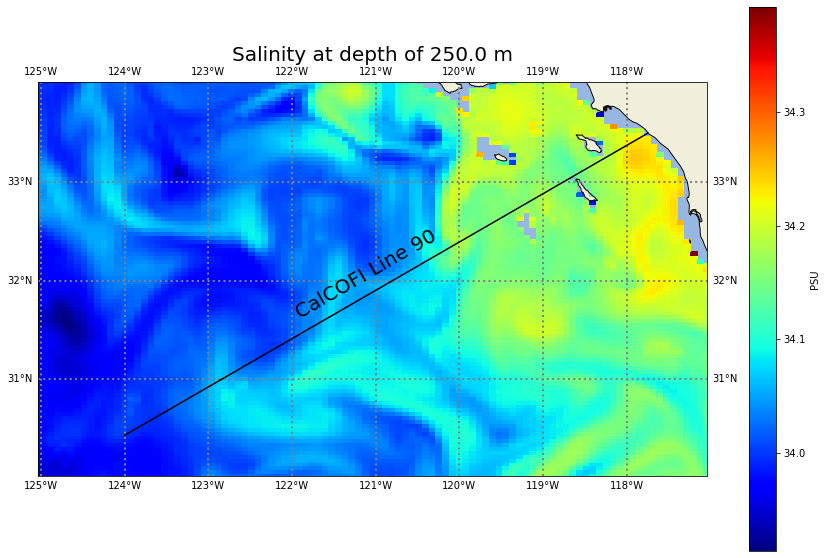

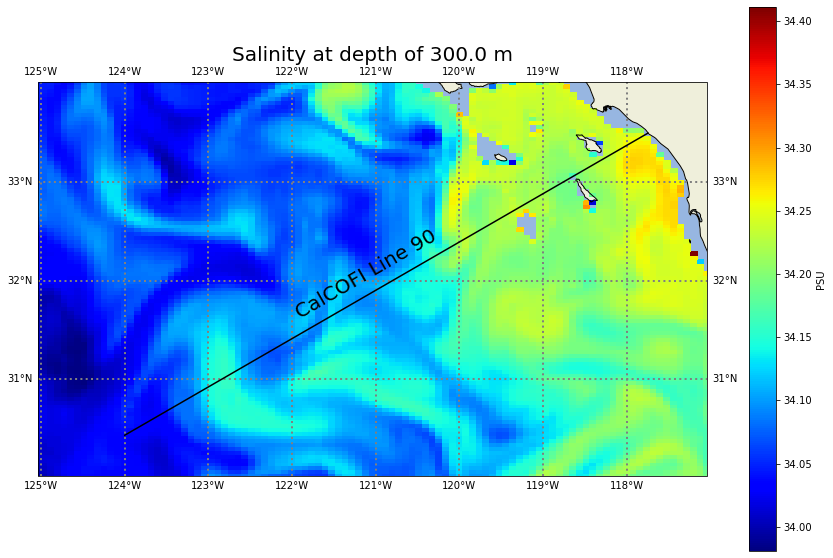

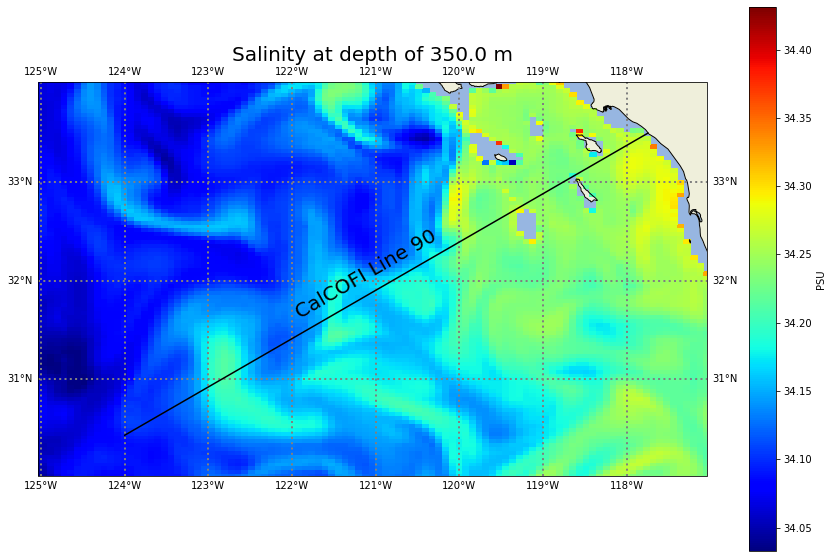

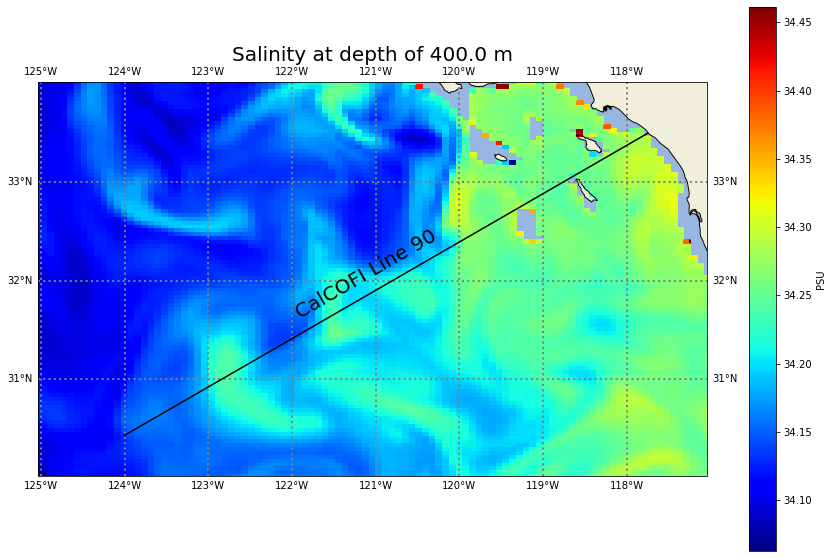

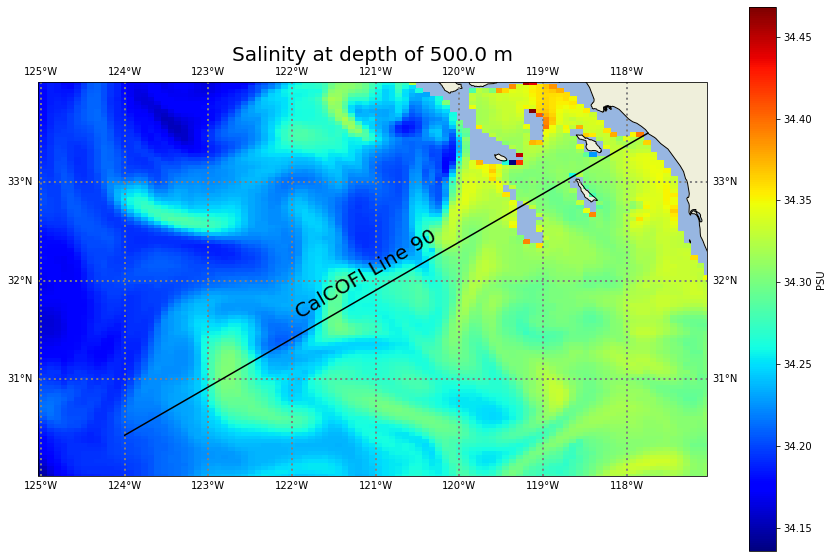

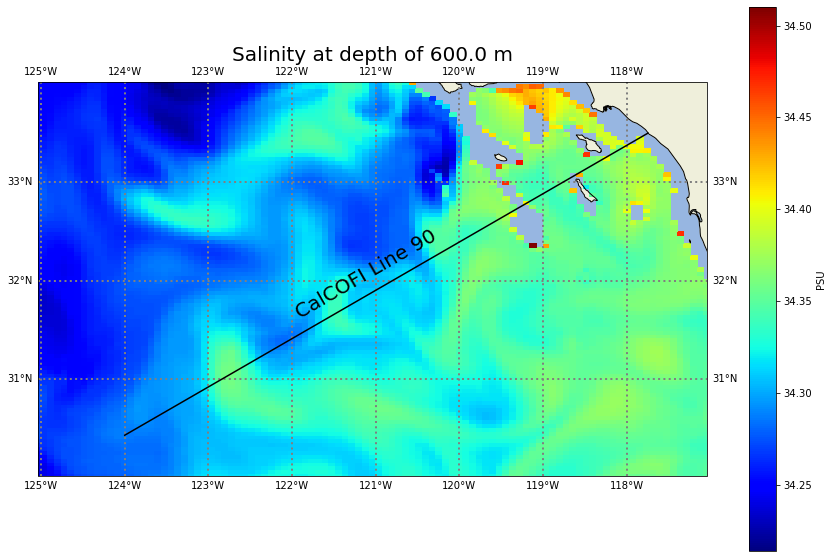

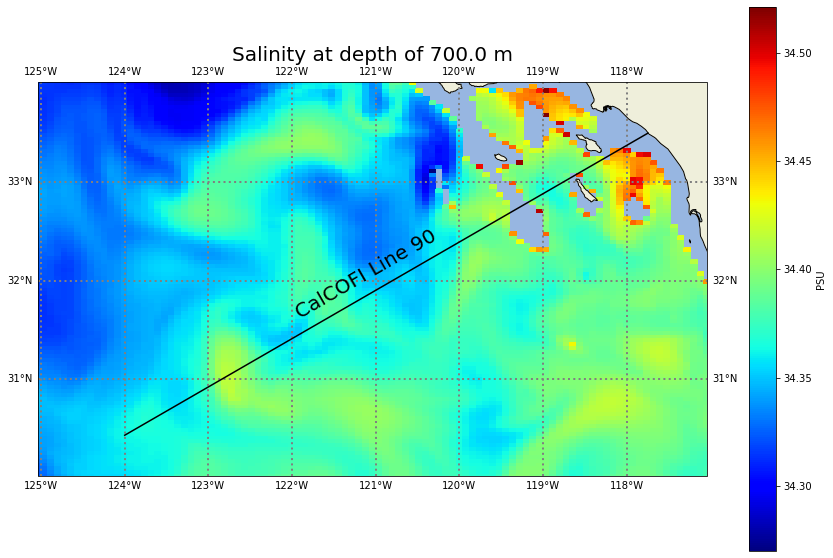

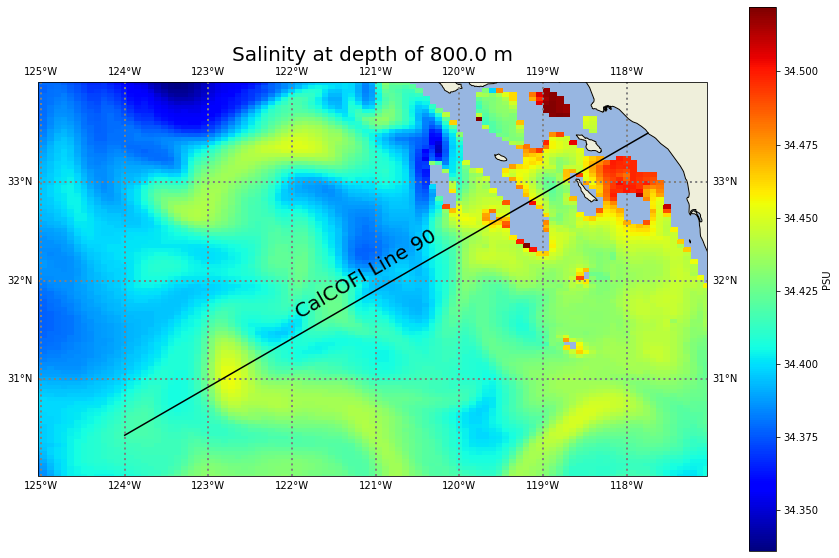

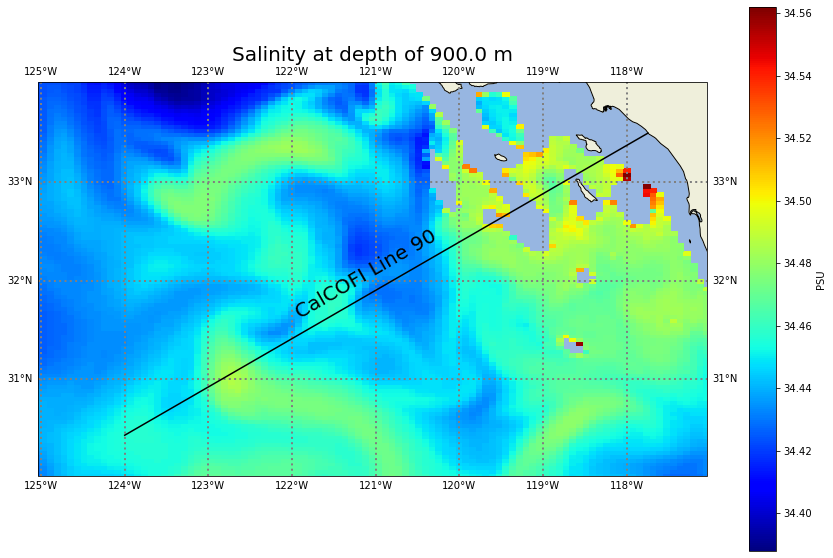

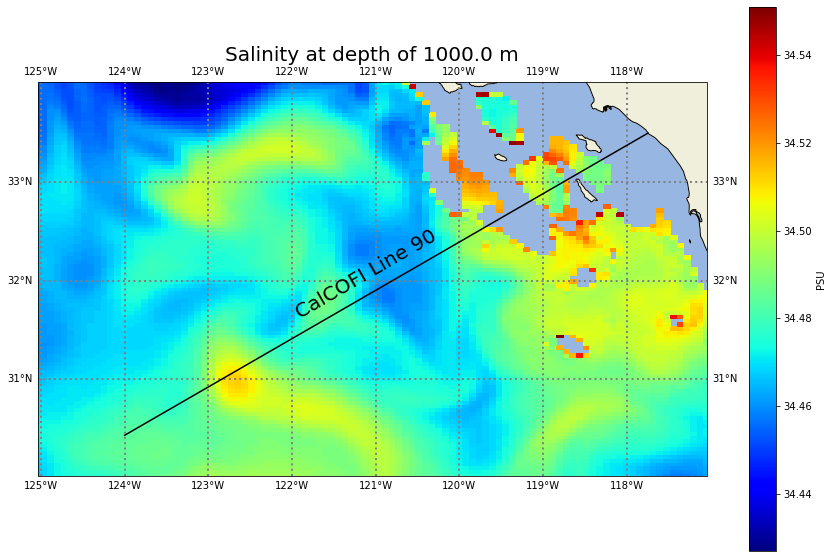

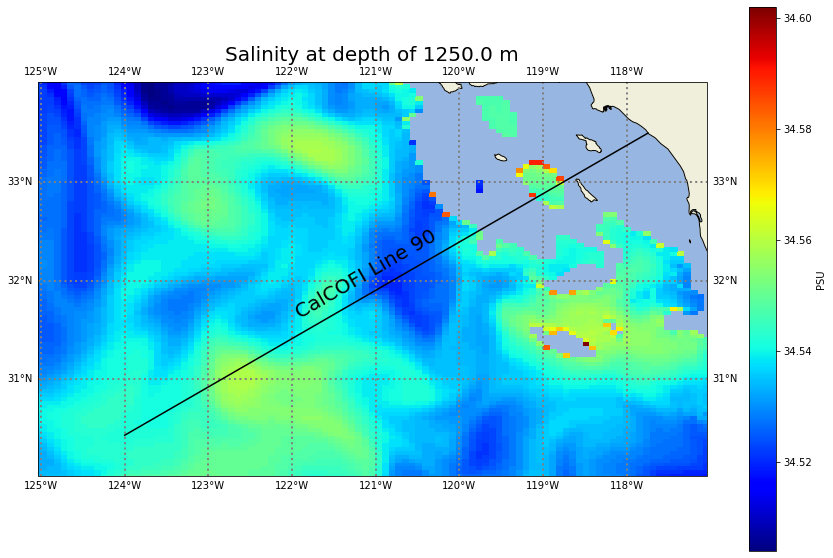

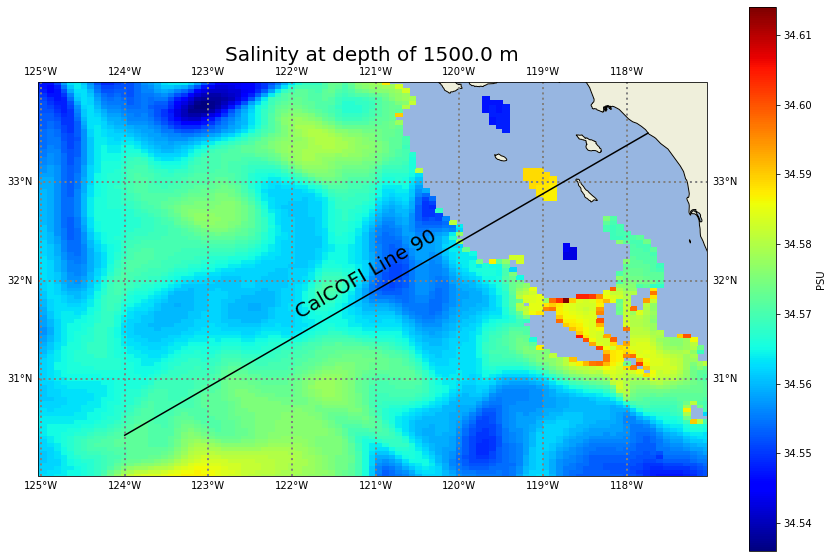

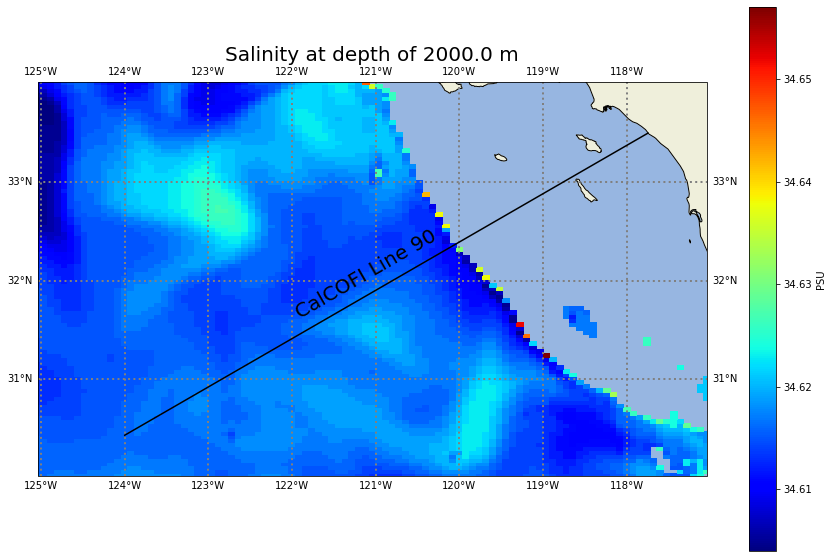

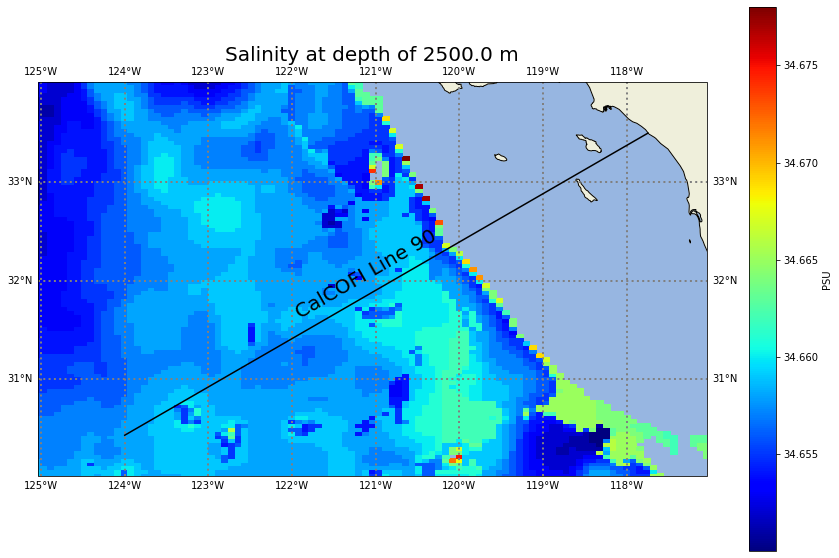

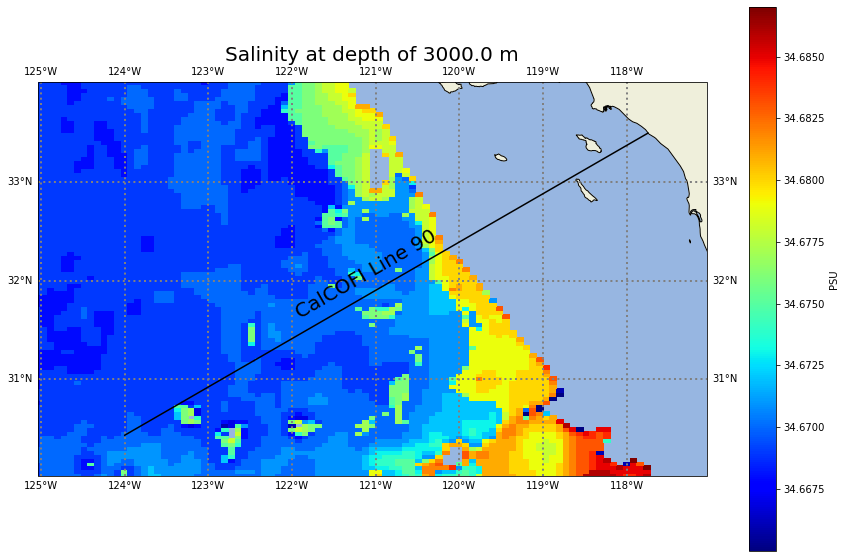

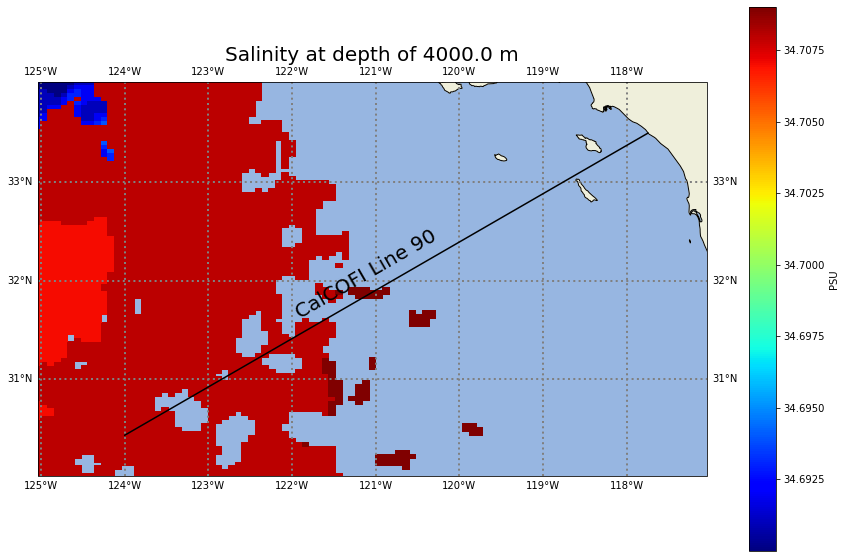

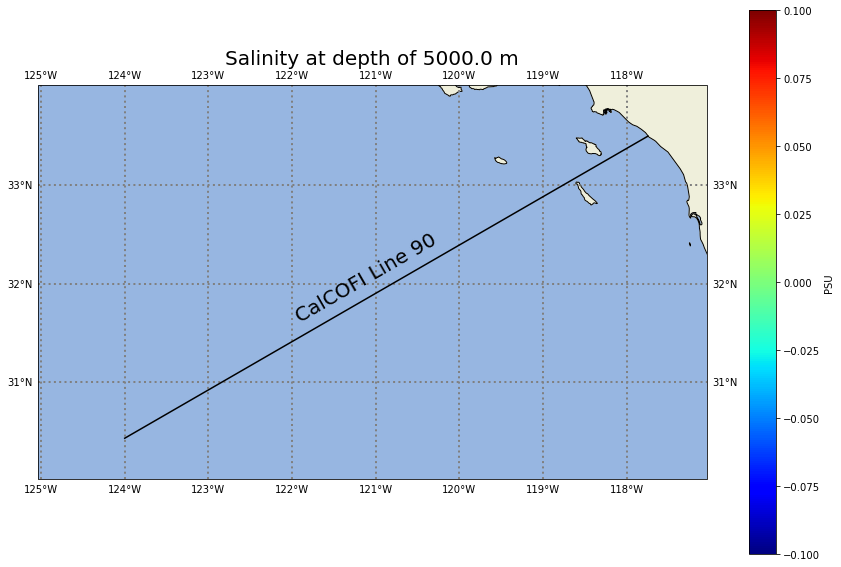

In [7]:
%%time
for i in range(0, len(depth)):

    var = netcdf_data.variables['salinity'][0,i] # salinity at depth index i

    proj = ccrs.Mercator()
    fig = plt.figure(figsize = (15, 10), frameon = True);
    ax = plt.axes(projection = proj)
    ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()])

    gl=ax.gridlines(draw_labels = True, ylocs = np.arange(0, 90, 1), xlocs = np.arange(-180, 180, 1), 
                    linewidth = 2, linestyle = "dotted", color = "grey")
    ax.add_feature(OCEAN);
    ax.add_feature(LAND);
    ax.coastlines();

    cm = ax.pcolormesh(xx,yy,var,transform = ccrs.PlateCarree(), cmap = "jet"); # data
    cb = plt.colorbar(cm);
    cb.set_label("PSU");
    
    plt.plot(lon90, lat90, 'k-', transform = ccrs.PlateCarree()); # CalCOFI line 90 - black line
    plt.title("Salinity at depth of " + str(depth[i]) + " m", fontsize = 20);
    plt.text(lon90.min()+2, lat90.min()+1.2, "CalCOFI Line 90", transform = ccrs.Geodetic(),
            fontsize = 20, rotation = 30);
    plt.savefig("Salinity/S_"+str(i+1)+".png", facecolor = "white"); # save each figure

print("Done!")

In [8]:
%%time
# Make salinity .gif!
S_frames = []
for i in range(0, len(depth)):
    new_frame = Image.open("Salinity/S_" + str(i+1) + ".png")
    S_frames.append(new_frame)

S_frames[0].save("Salinity.gif", format = "GIF", append_images = S_frames[1:],
                save_all = True, duration = 250, loop = 0)

Wall time: 1.59 s


## Temperature

Done!
Wall time: 33.4 s


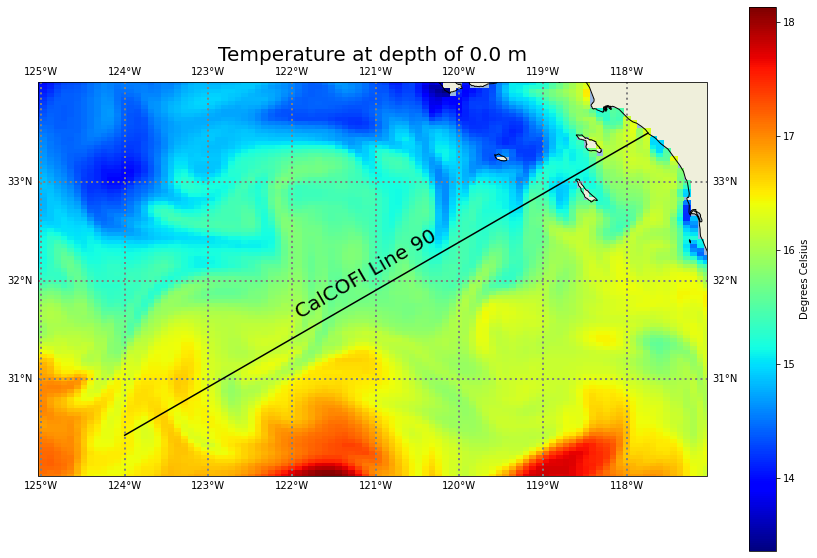

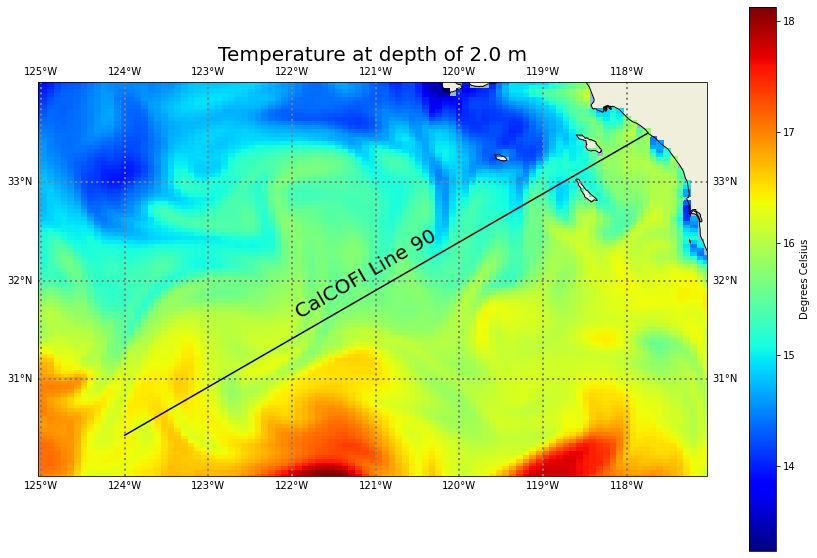

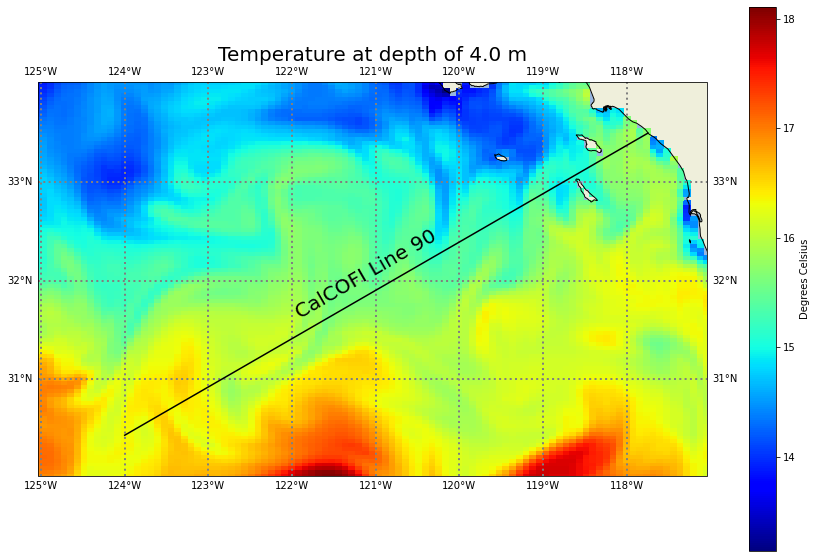

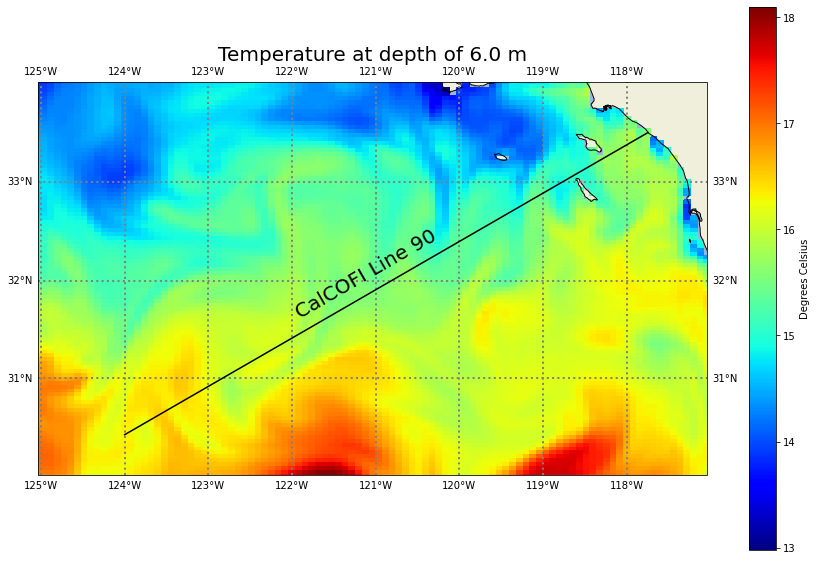

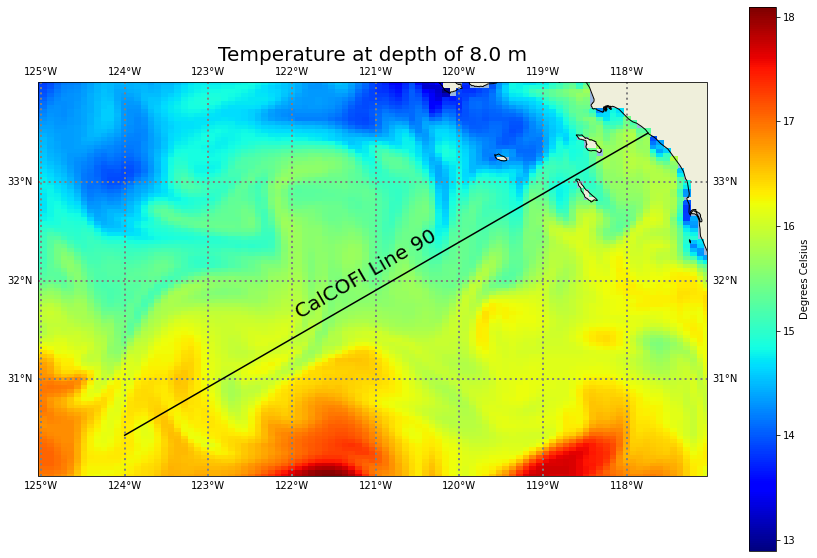

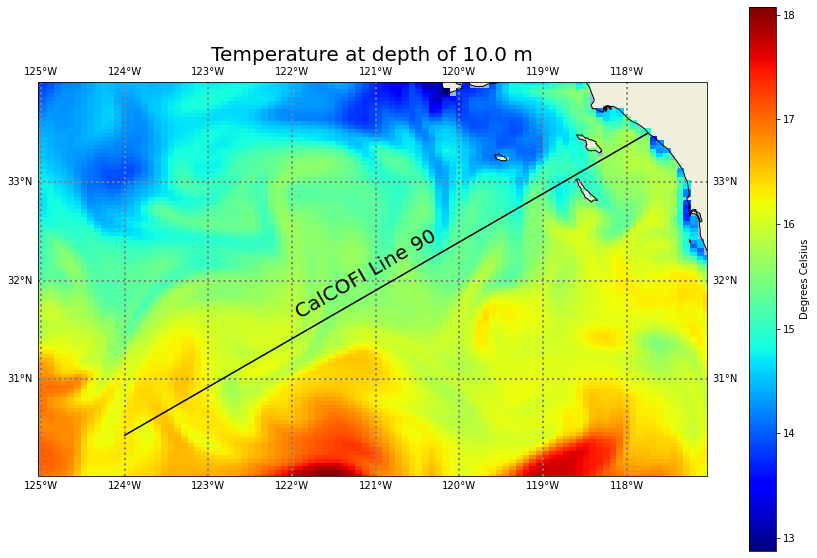

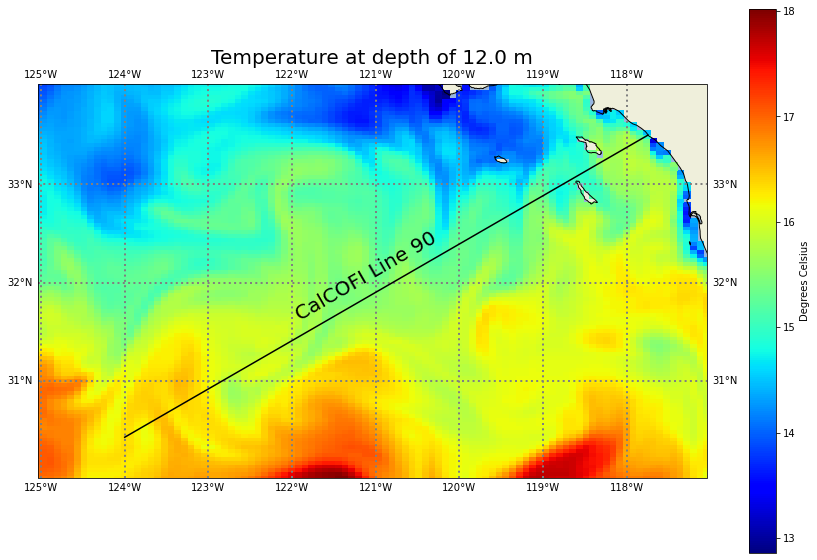

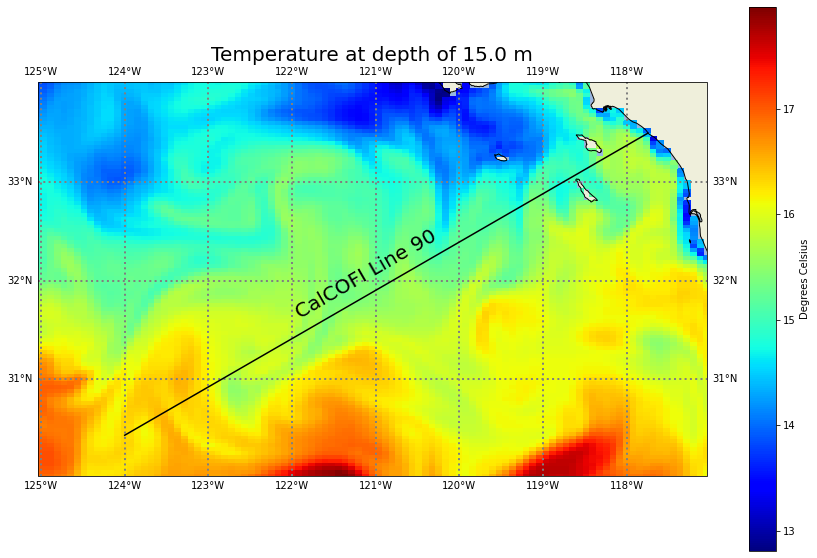

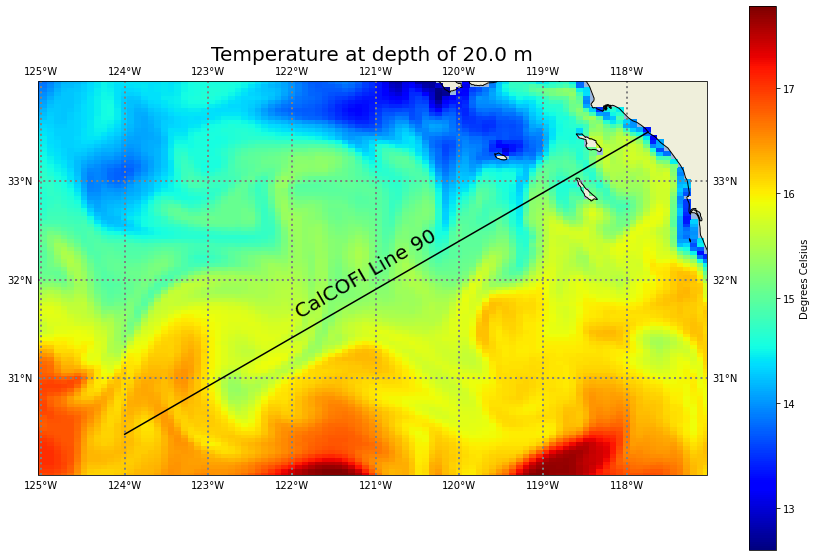

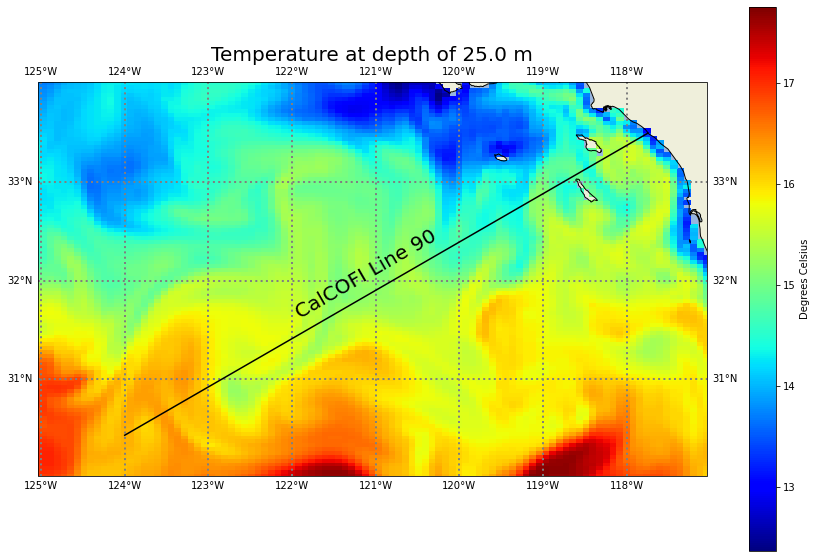

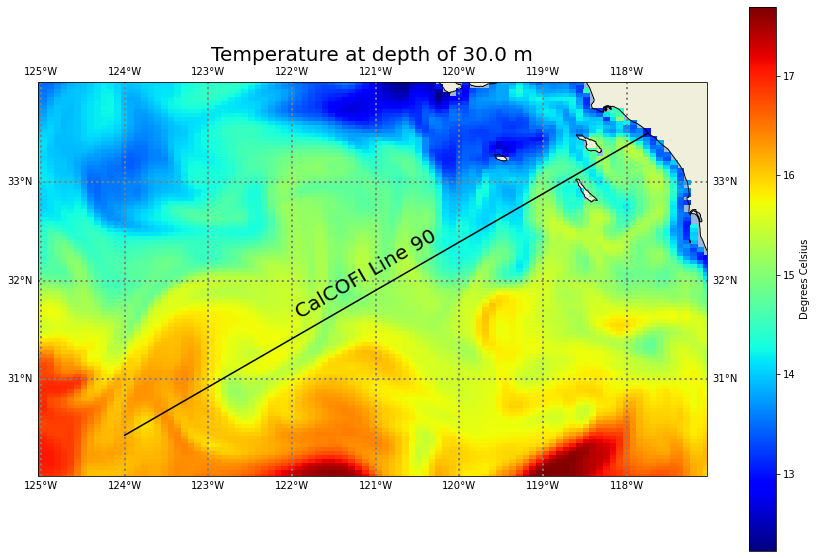

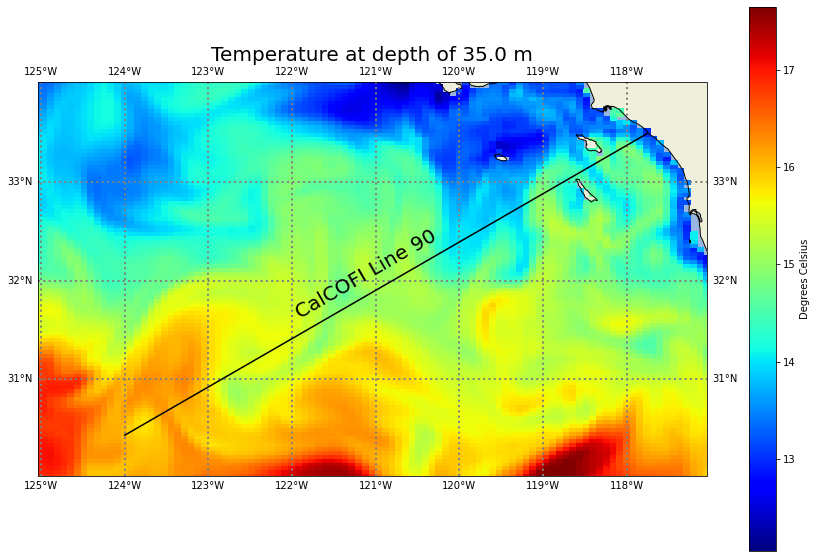

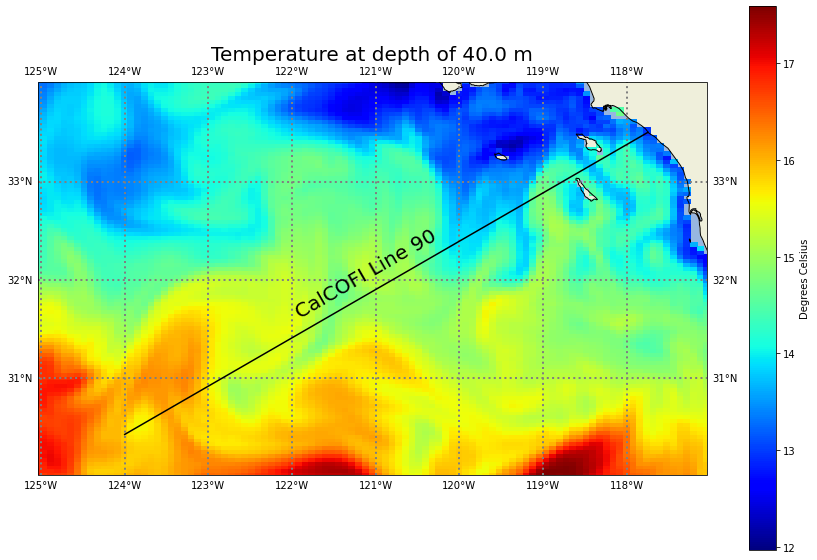

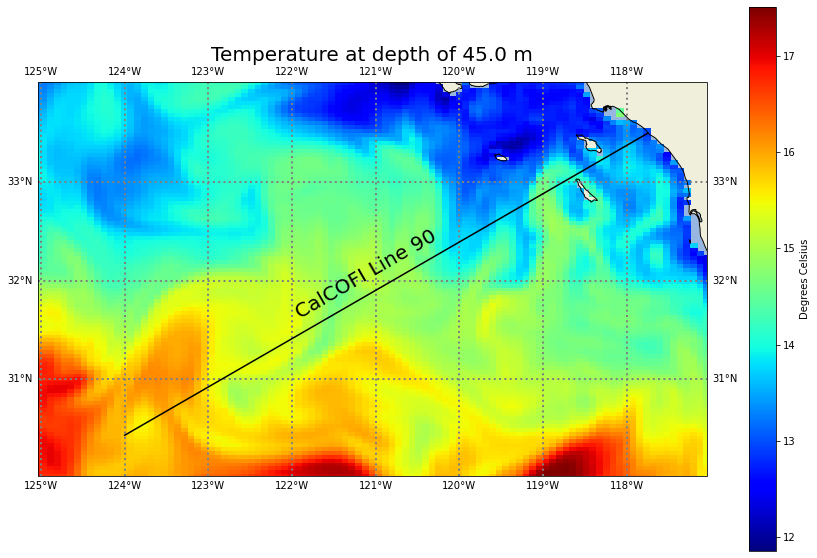

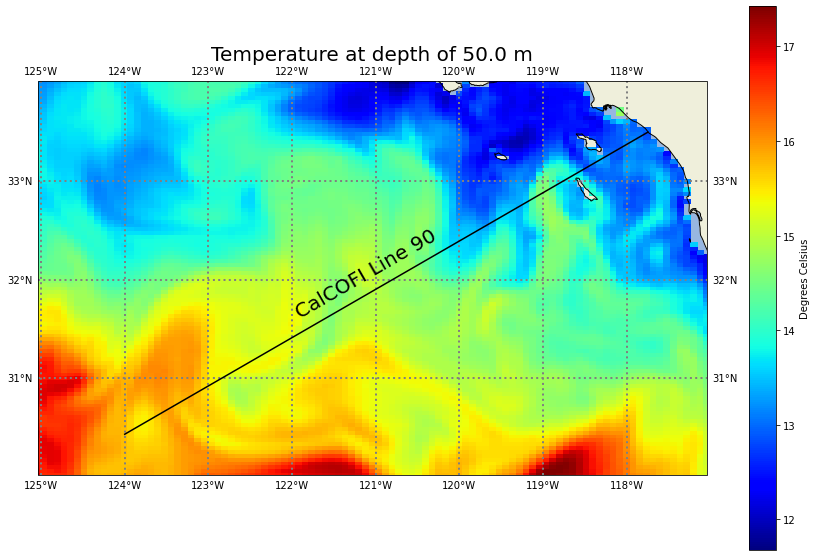

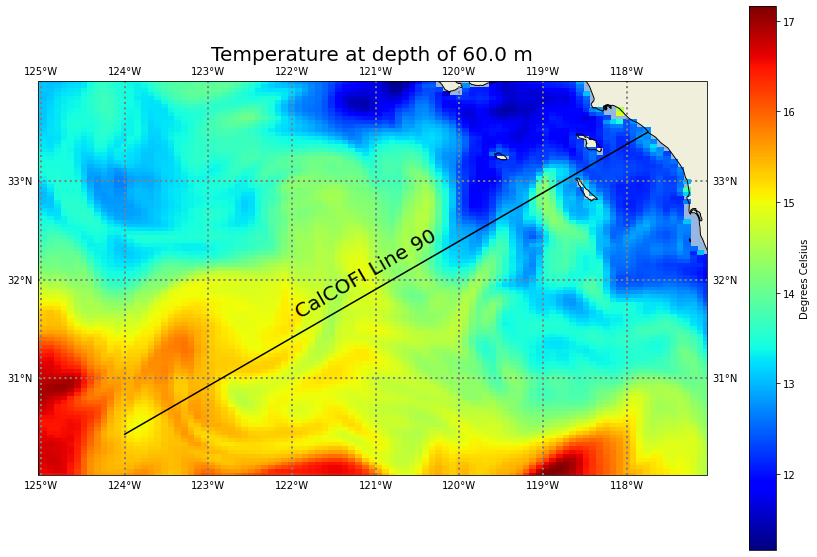

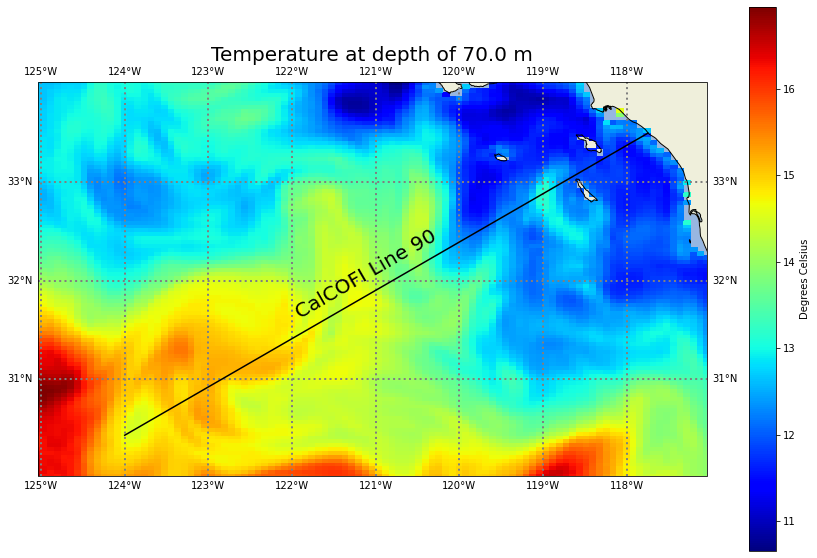

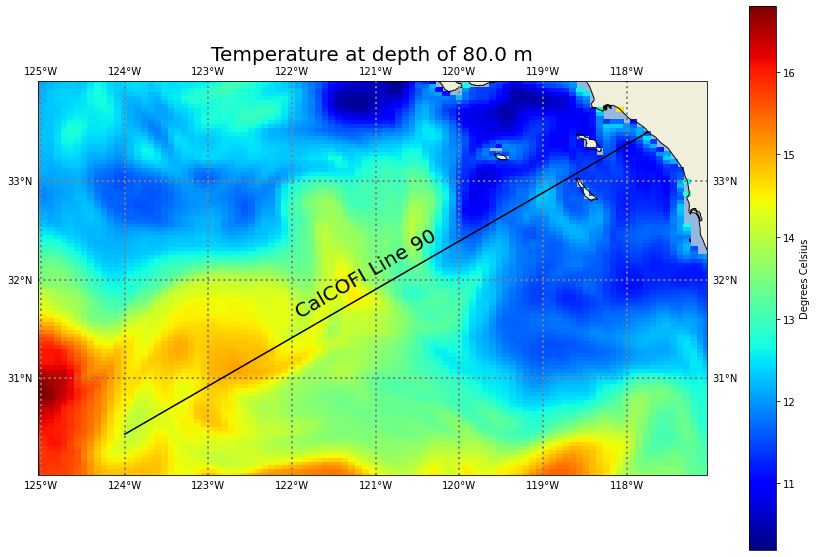

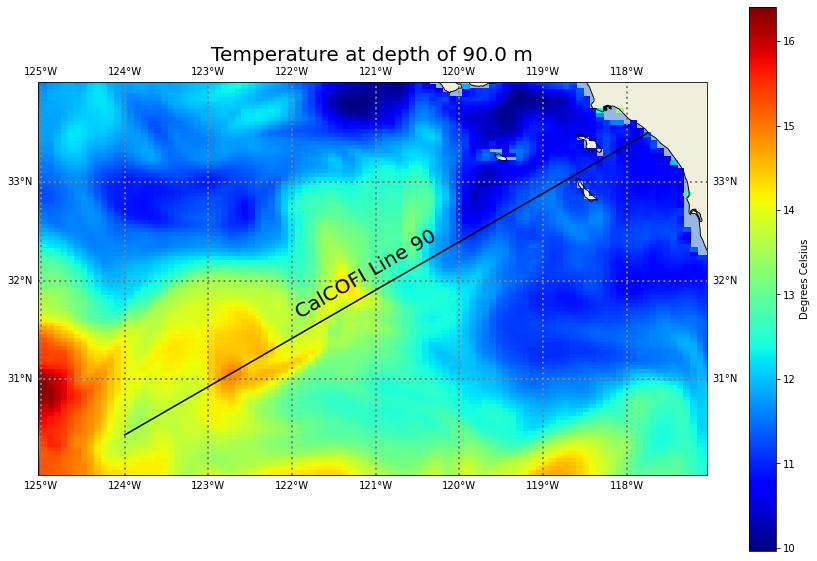

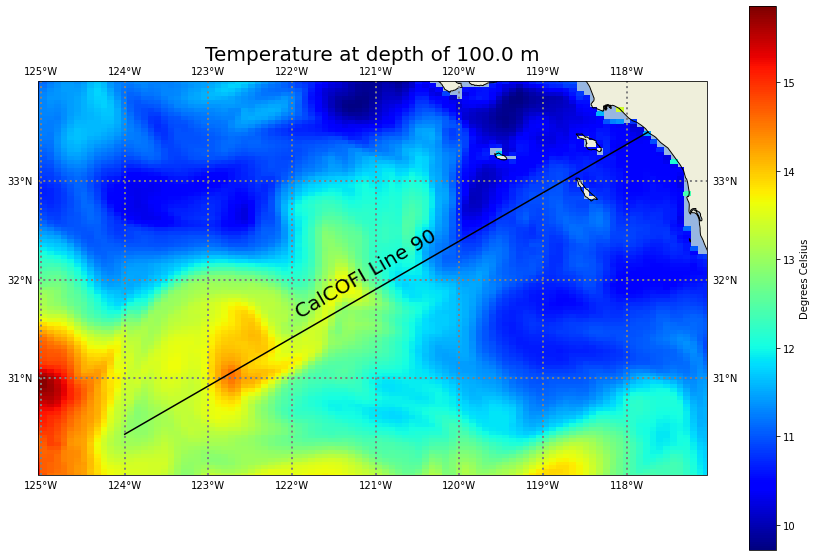

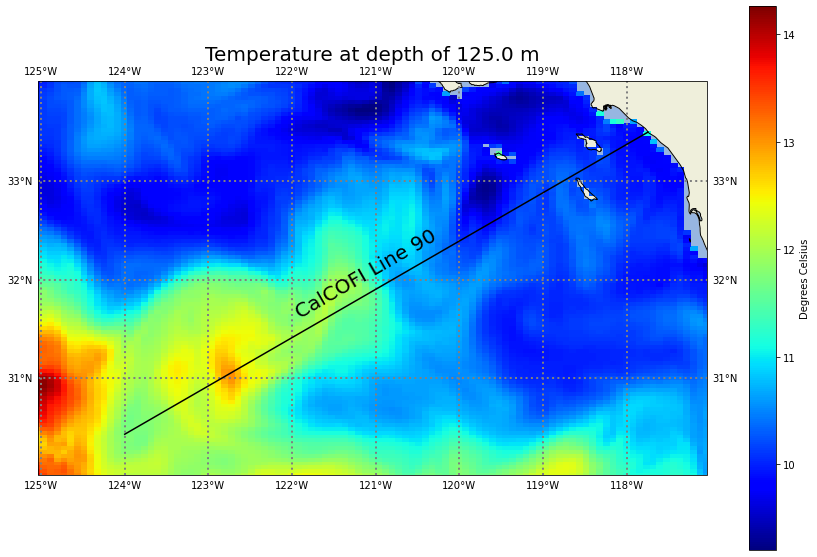

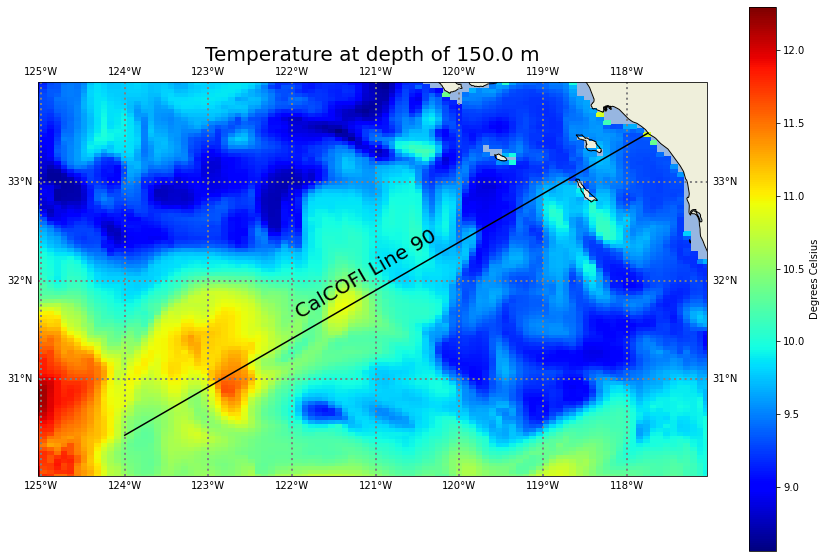

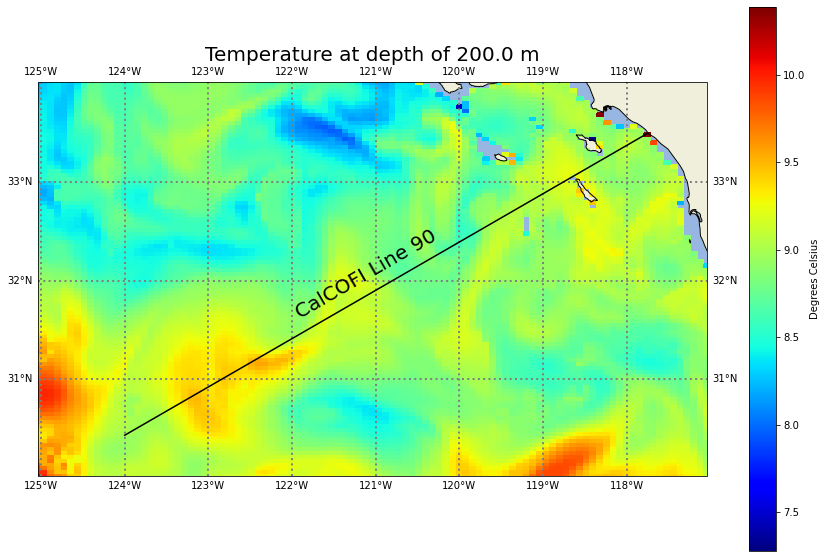

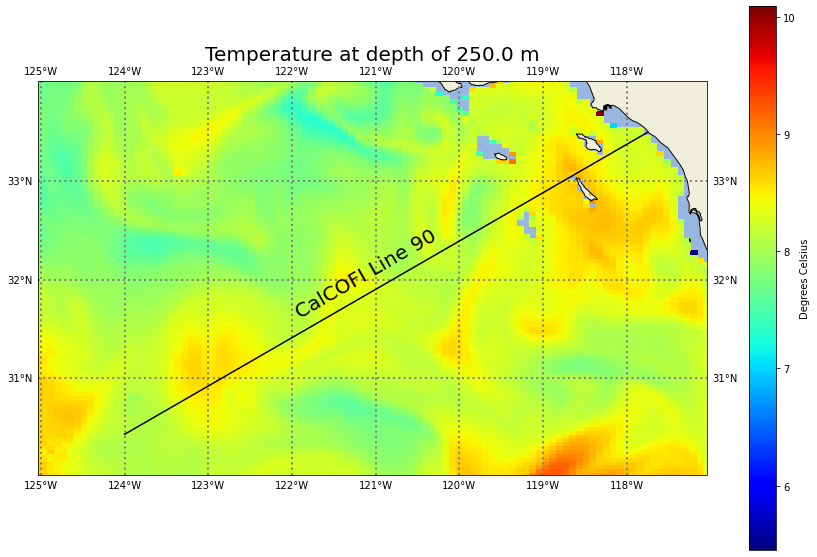

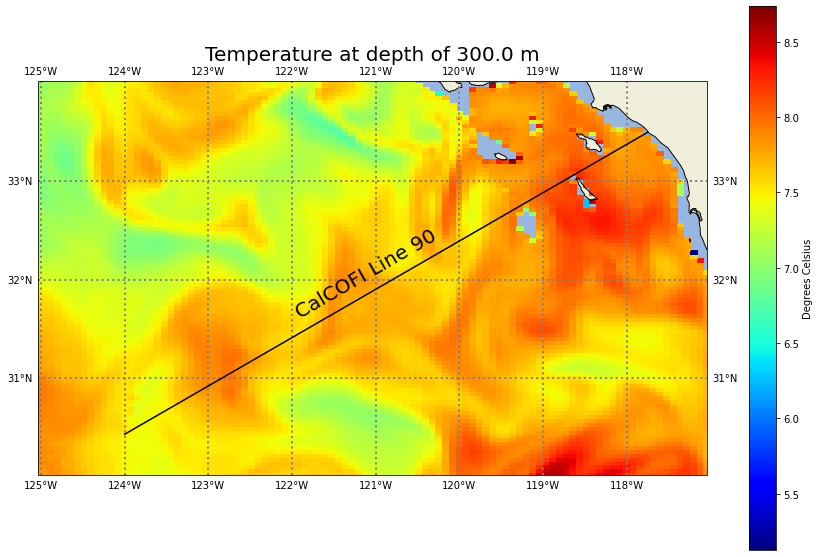

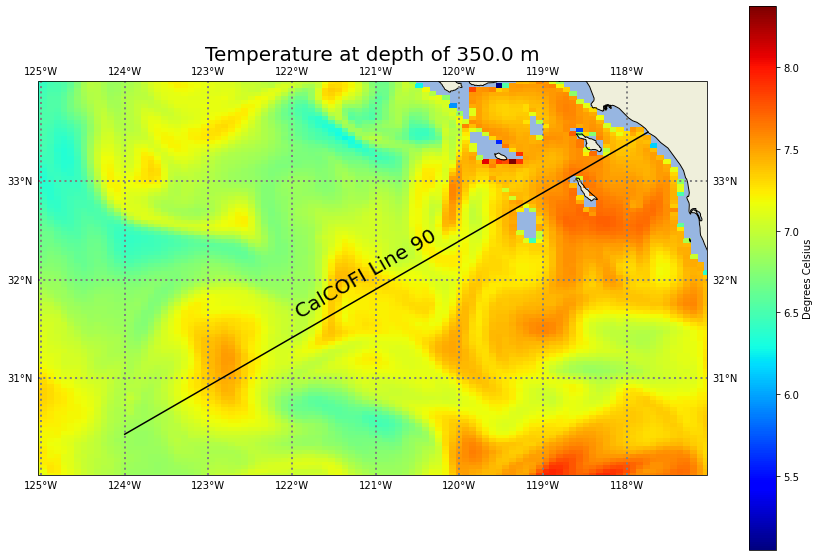

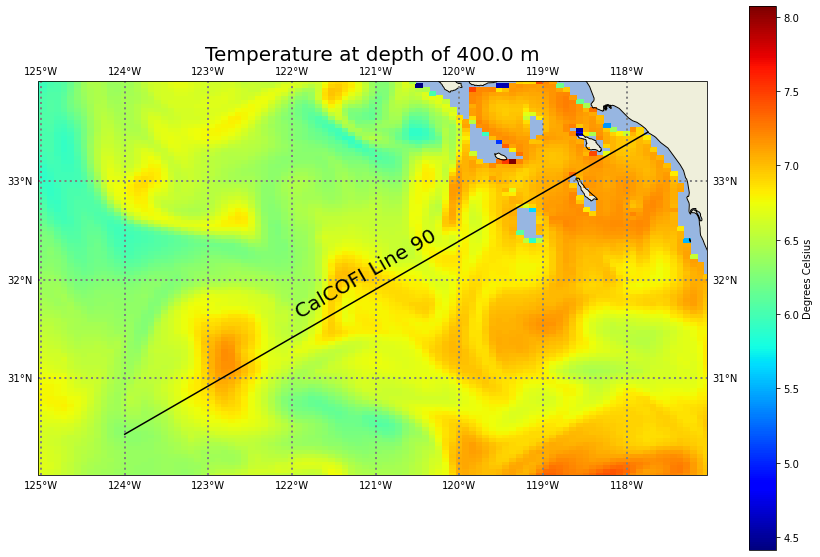

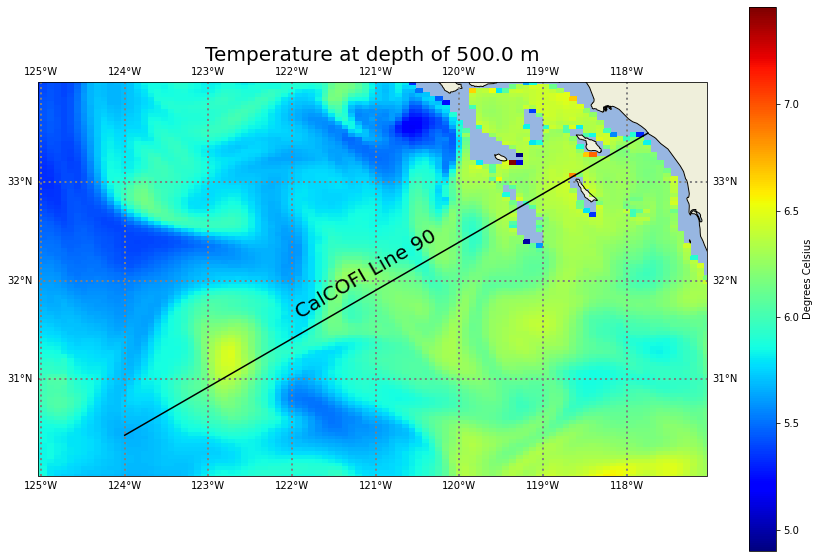

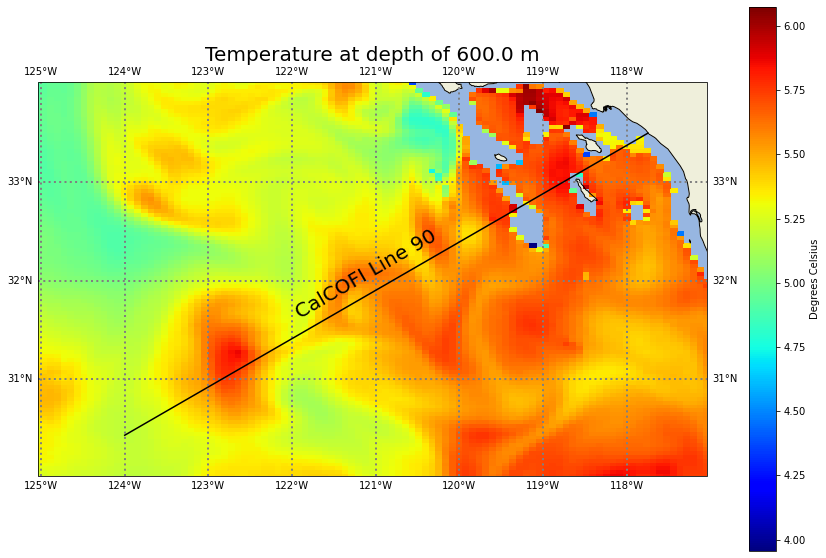

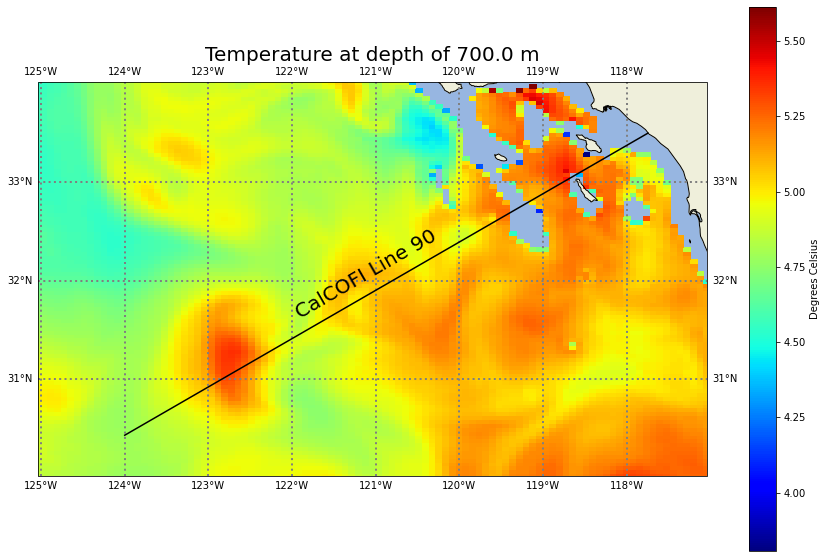

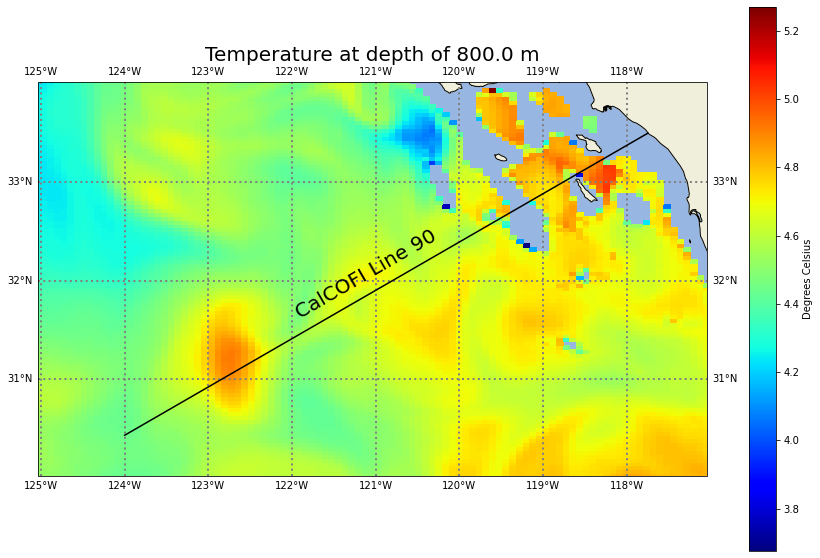

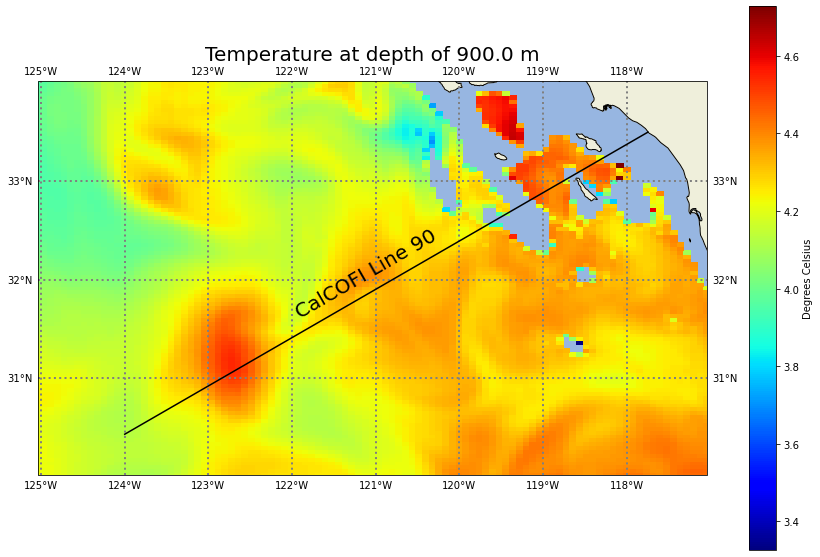

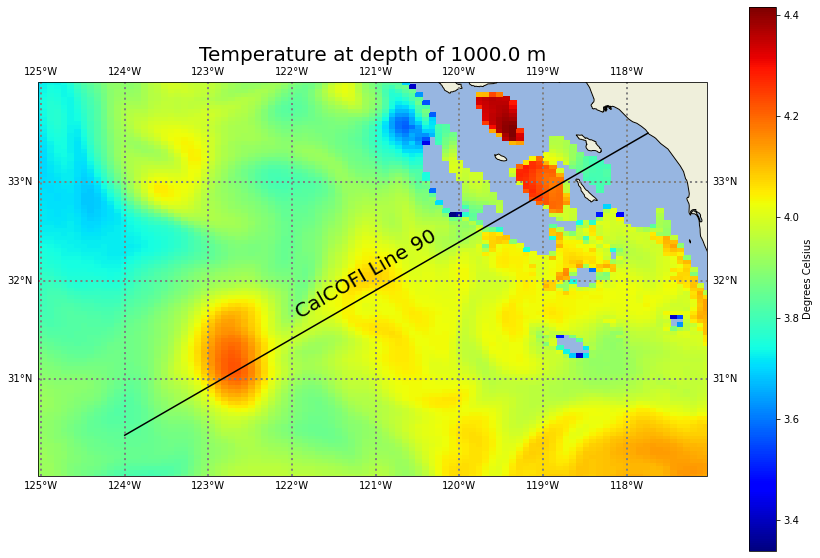

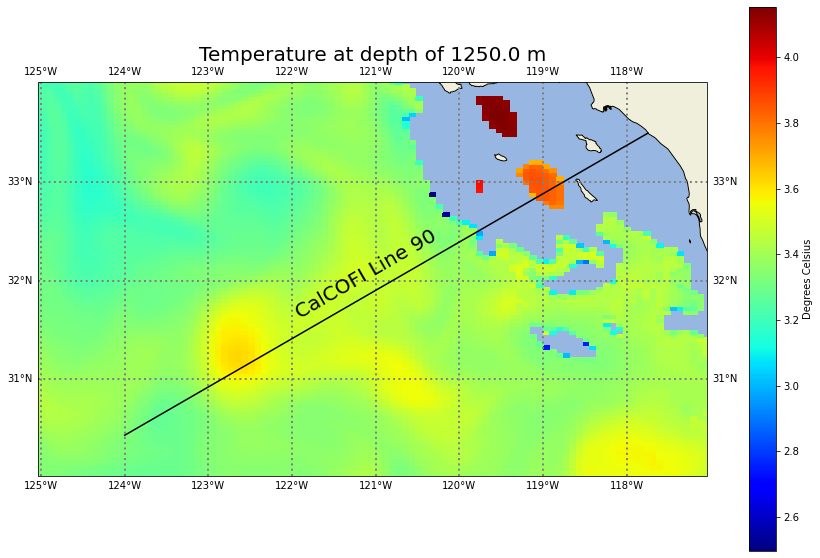

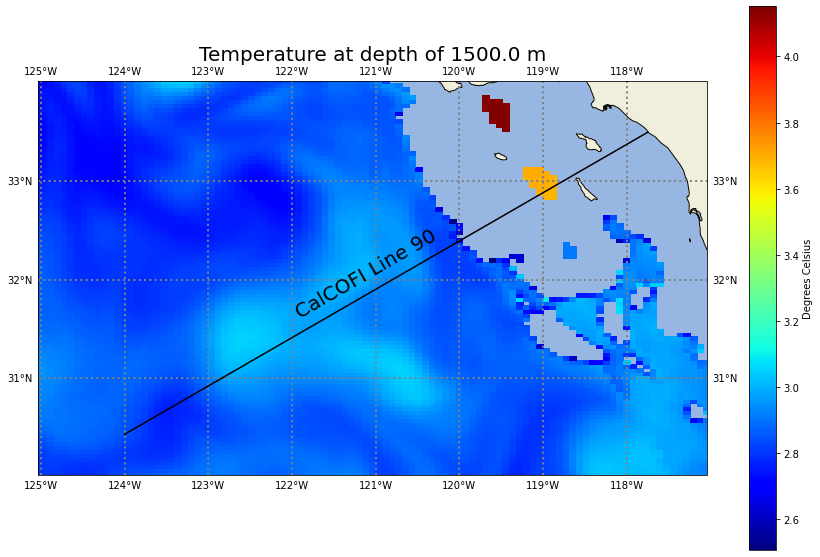

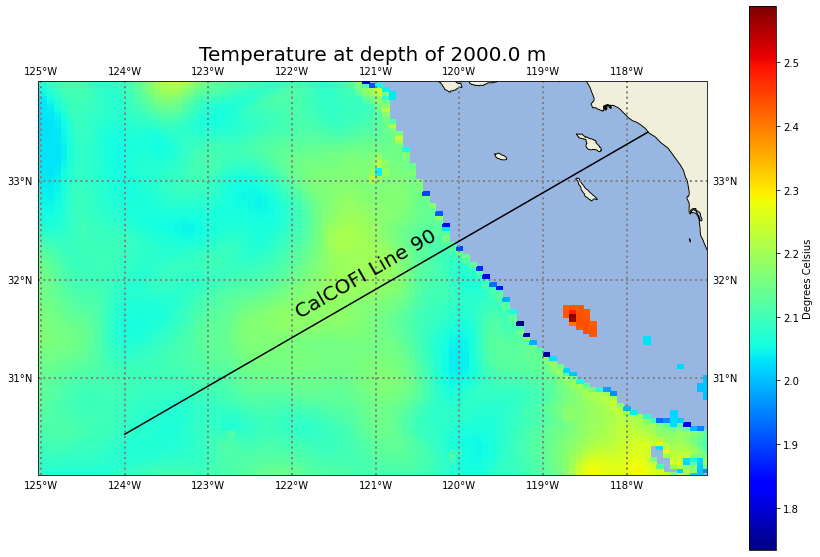

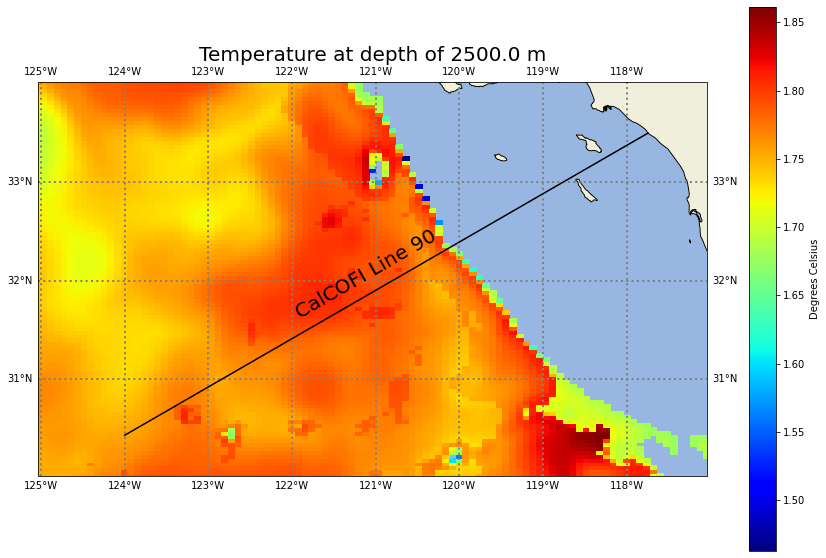

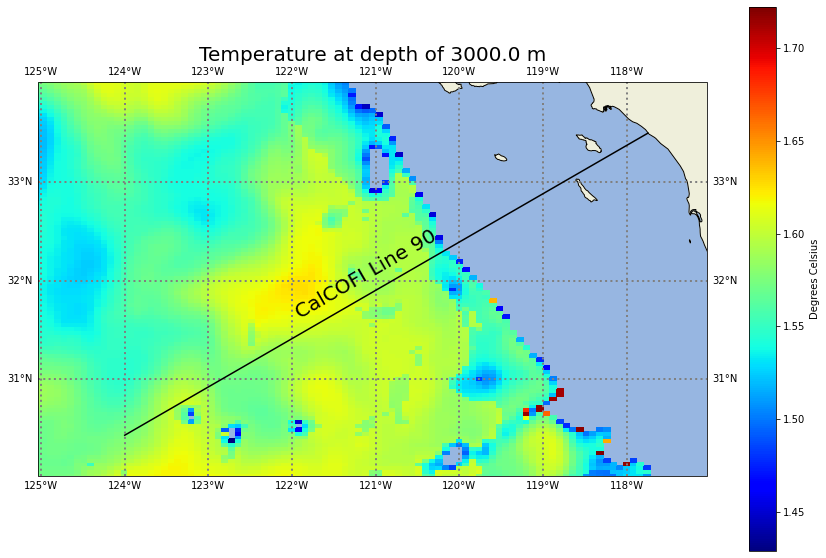

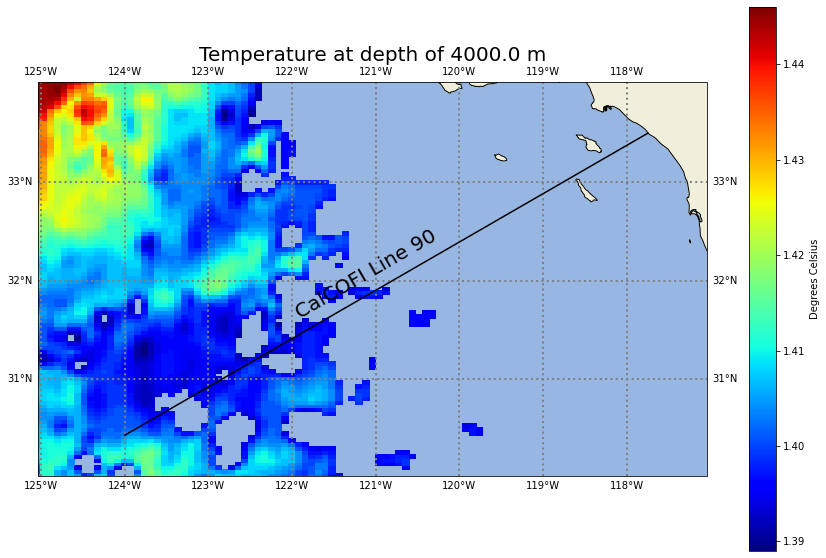

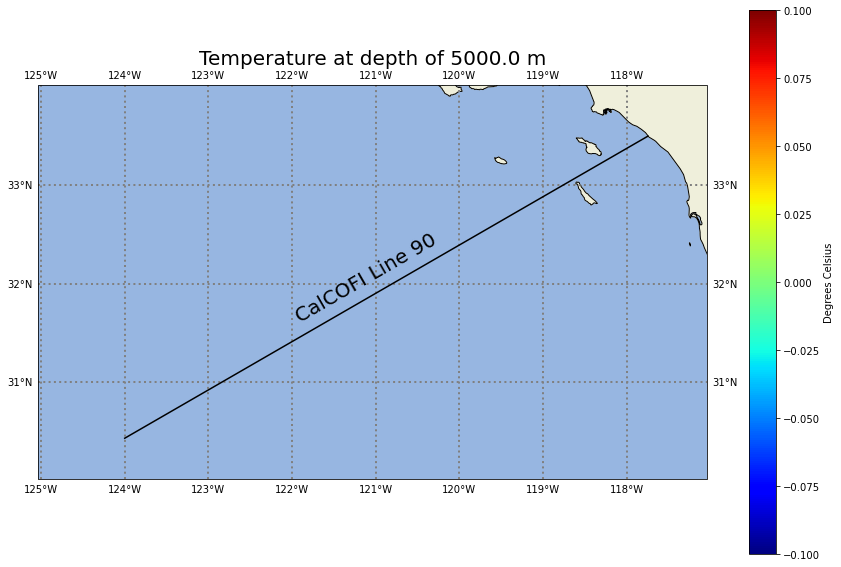

In [9]:
%%time
for i in range(0, len(depth)):

    var = netcdf_data.variables['water_temp'][0,i] # salinity at depth index i

    proj = ccrs.Mercator()
    fig = plt.figure(figsize = (15, 10), frameon = True);
    ax = plt.axes(projection = proj)
    ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()])

    gl=ax.gridlines(draw_labels = True, ylocs = np.arange(0, 90, 1), xlocs = np.arange(-180, 180, 1), 
                    linewidth = 2, linestyle = "dotted", color = "grey")
    ax.add_feature(OCEAN);
    ax.add_feature(LAND);
    ax.coastlines();

    cm = ax.pcolormesh(xx,yy,var,transform = ccrs.PlateCarree(), cmap = "jet"); # data
    cb = plt.colorbar(cm);
    cb.set_label("Degrees Celsius");
    
    plt.plot(lon90, lat90, 'k-', transform = ccrs.PlateCarree()); # CalCOFI line 90 - black line
    plt.title("Temperature at depth of " + str(depth[i]) + " m", fontsize = 20);
    plt.text(lon90.min()+2, lat90.min()+1.2, "CalCOFI Line 90", transform = ccrs.Geodetic(),
            fontsize = 20, rotation = 30);
    plt.savefig("Temperature/T_"+str(i+1)+".png", facecolor = "white"); # save each figure

print("Done!")

In [10]:
%%time
# Make temperature .gif!
T_frames = []
for i in range(0, len(depth)):
    new_frame = Image.open("Temperature/T_" + str(i+1) + ".png")
    T_frames.append(new_frame)

T_frames[0].save("Temperature.gif", format = "GIF", append_images = T_frames[1:],
                save_all = True, duration = 250, loop = 0)

Wall time: 1.72 s
